# Tratamento das Bases de Epilepsia do Rio de Janeiro de 2014 a 2022




## Observações

Para que este notebook funcione corretamente devem ser importadas as bases de dados do SIASUS de 2014 a 2023 de epilepsia do estado do Rio de Janeiro

# Importando as Bases

In [496]:
# Import

import pandas as pd
import numpy as np

rj_epilepsia_total = []
for i in range(2014, 2024):
    arquivo = f"../Dados/Bases sem tratamento/rj_epilepsia_{i}.csv"
    epilepsia = pd.read_csv(arquivo, sep = ',', encoding='latin-1')
    rj_epilepsia_total.append(epilepsia)


# Concatenando, Refazendo o Indice e exportando

In [497]:
# Concatenando as bases

rj_epilepsia_total = pd.concat(rj_epilepsia_total)
rj_epilepsia_total

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,...,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AP_ETNIA,AM_PESO,AM_ALTURA,AM_TRANSPL,AM_QTDTRAN,AM_GESTANT,AP_NATJUR
0,201401,EP,330000,4046374,3314200119395,201401,604500076,0.0,330455,43,...,0,G400,0,NaN,70,160,N,0,N,NaN
1,201401,EP,330000,4046374,3313205302011,201401,604500050,0.0,330455,43,...,0,G400,0,NaN,74,172,N,0,N,NaN
2,201401,EP,330000,4046374,3313205093176,201401,604500084,0.0,330455,43,...,0,G404,0,NaN,53,161,N,0,N,NaN
3,201401,EP,330000,4046374,3314200196615,201401,604500050,0.0,330455,43,...,0,G405,0,NaN,0,0,N,0,N,NaN
4,201401,EP,330000,4046374,3313204973529,201312,604500050,0.0,330455,43,...,0,G408,0,NaN,57,158,N,0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18787,202312,EP,330000,3343715,3323202910291,202312,604500076,0.0,330455,68,...,0,G408,0,NaN,54,168,N,0,N,1023.0
18788,202312,EP,330000,4046374,3323202750439,202312,604500050,0.0,330455,43,...,0,G402,0,NaN,69,164,N,0,N,1023.0
18789,202312,EP,330000,3343715,3323202639691,202312,604500106,0.0,330455,68,...,0,G402,0,NaN,61,164,N,0,N,1023.0
18790,202312,EP,330000,3343715,3323202592479,202312,604500106,0.0,330455,68,...,0,G403,0,NaN,70,146,N,0,N,1023.0


In [498]:
# Refazendo o Indice

rj_epilepsia_total.index = range(rj_epilepsia_total.shape[0])
rj_epilepsia_total

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,...,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AP_ETNIA,AM_PESO,AM_ALTURA,AM_TRANSPL,AM_QTDTRAN,AM_GESTANT,AP_NATJUR
0,201401,EP,330000,4046374,3314200119395,201401,604500076,0.0,330455,43,...,0,G400,0,NaN,70,160,N,0,N,NaN
1,201401,EP,330000,4046374,3313205302011,201401,604500050,0.0,330455,43,...,0,G400,0,NaN,74,172,N,0,N,NaN
2,201401,EP,330000,4046374,3313205093176,201401,604500084,0.0,330455,43,...,0,G404,0,NaN,53,161,N,0,N,NaN
3,201401,EP,330000,4046374,3314200196615,201401,604500050,0.0,330455,43,...,0,G405,0,NaN,0,0,N,0,N,NaN
4,201401,EP,330000,4046374,3313204973529,201312,604500050,0.0,330455,43,...,0,G408,0,NaN,57,158,N,0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,EP,330000,3343715,3323202910291,202312,604500076,0.0,330455,68,...,0,G408,0,NaN,54,168,N,0,N,1023.0
103526,202312,EP,330000,4046374,3323202750439,202312,604500050,0.0,330455,43,...,0,G402,0,NaN,69,164,N,0,N,1023.0
103527,202312,EP,330000,3343715,3323202639691,202312,604500106,0.0,330455,68,...,0,G402,0,NaN,61,164,N,0,N,1023.0
103528,202312,EP,330000,3343715,3323202592479,202312,604500106,0.0,330455,68,...,0,G403,0,NaN,70,146,N,0,N,1023.0


In [499]:
# Export 

rj_epilepsia_total.to_csv('../Dados/Base atualizada/rj_epilepsia_total.csv', sep =';')

# Formatando as colunas

## Mudando o nome das Colunas

In [500]:
# Selecionando apenas as colunas que são interessantes para a nossa analise

colunas_desejadas = ['AP_MVM', 'AP_CMP', 'AP_PRIPAL', 'AP_CNSPCN', 'AP_COIDADE', 'AP_NUIDADE', 'AP_DTSOLIC','AP_SEXO', 'AP_RACACOR', 'AP_MUNPCN', 'AP_CEPPCN', 'AP_TPATEN', 'AP_TPAPAC', 'AP_MOTSAI', 'AP_OBITO', 'AP_ENCERR', 'AP_PERMAN', 'AP_ALTA', 'AP_TRANSF', 'AP_DTOCOR', 'AP_APACANT', 'AP_CIDCAS', 'AP_CIDPRI', 'AP_CIDSEC']
rj_epilepsia_total = pd.DataFrame(rj_epilepsia_total[colunas_desejadas])
rj_epilepsia_total

,AP_MVM,AP_CMP,AP_PRIPAL,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_DTSOLIC,AP_SEXO,AP_RACACOR,AP_MUNPCN,...,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_APACANT,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,0,0,1,0,0,NaN,0,0,G400,0
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,0,0,1,0,0,NaN,0,0,G400,0
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,0,0,1,0,0,NaN,0,0,G404,0
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,0,0,1,0,0,NaN,0,0,G405,0
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,0,0,1,0,0,NaN,0,0,G408,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,1,0,0,NaN,0,0,G408,0
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,0,1,0,0,NaN,0,0,G402,0
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,1,0,0,NaN,0,0,G402,0
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,0,1,0,0,NaN,0,0,G403,0


In [501]:
# Renomeando as colunas

# novo_nome_colunas = {'AP_MVM': 'data_processamento', 'AP_CMP': 'data_atendimento_paciente', 'AP_PRIPAL': 'procedimento_principal', 'AP_CNSPCN': 'numero_cns_paciente', 'AP_COIDADE': 'codigo_idade_paciente', 'AP_NUIDADE': 'numero_idade', 'AP_SEXO': 'sexo_paciente', 'AP_RACACOR': 'raca_paciente', 'AP_MUNPCN': 'codigo_uf_municipio_residencia', 'AP_CEPPCN': 'cep_paciente', 'AP_TPATEN': 'tipo_atendimento', 'AP_TPAPAC': 'tipo_apac', 'AP_MOTSAI': 'motivo_saida_permanencia', 'AP_OBITO': 'indicador_obito', 'AP_ENCERR': 'indicador_encerramento', 'AP_PERMAN': 'indicador_permanencia', 'AP_ALTA': 'indicador_alta', 'AP_TRANSF': 'indicador_transferencia', 'AP_DTOCOR': 'data_ocorrencia', 'AP_APACANT': 'numero_apac_anterior', 'AP_CIDCAS': 'cid_causas_associadas', 'AP_CIDPRI': 'cid_principal', 'AP_CIDSEC': 'cid_sencundario'}
novo_nome_colunas = {'AP_DTSOLIC':'data_completa_atendimento' ,'AP_MVM': 'data_processamento', 'AP_CMP': 'data_atendimento_paciente', 'AP_PRIPAL': 'procedimento_principal', 'AP_CNSPCN': 'numero_cns_paciente', 'AP_COIDADE': 'codigo_idade_paciente', 'AP_NUIDADE': 'numero_idade', 'AP_SEXO': 'sexo_paciente', 'AP_RACACOR': 'raca_paciente', 'AP_MUNPCN': 'codigo_uf_municipio_residencia', 'AP_CEPPCN': 'cep_paciente', 'AP_TPATEN': 'tipo_atendimento', 'AP_TPAPAC': 'tipo_apac', 'AP_MOTSAI': 'motivo_saida_permanencia', 'AP_OBITO': 'indicador_obito', 'AP_ENCERR': 'indicador_encerramento', 'AP_PERMAN': 'indicador_permanencia', 'AP_ALTA': 'indicador_alta', 'AP_TRANSF': 'indicador_transferencia', 'AP_DTOCOR': 'data_ocorrencia', 'AP_APACANT': 'numero_apac_anterior', 'AP_CIDCAS': 'cid_causas_associadas', 'AP_CIDPRI': 'cid_principal', 'AP_CIDSEC': 'cid_sencundario'}


In [502]:
# Renomeando no DF

rj_epilepsia_total = rj_epilepsia_total.rename(columns=novo_nome_colunas)
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,indicador_obito,indicador_encerramento,indicador_permanencia,indicador_alta,indicador_transferencia,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,0,0,1,0,0,NaN,0,0,G400,0
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,0,0,1,0,0,NaN,0,0,G400,0
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,0,0,1,0,0,NaN,0,0,G404,0
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,0,0,1,0,0,NaN,0,0,G405,0
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,0,0,1,0,0,NaN,0,0,G408,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,1,0,0,NaN,0,0,G408,0
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,0,1,0,0,NaN,0,0,G402,0
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,1,0,0,NaN,0,0,G402,0
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,0,1,0,0,NaN,0,0,G403,0


In [503]:
rj_epilepsia_total["numero_cns_paciente"].nunique()

5851

In [504]:
rj_epilepsia_total.to_csv('../Dados/Base atualizada/rj_epilepsia_total.csv', sep =';')

## Criando colunas com valores Equivalentes

### CID

In [505]:
# Dicionário de mapeamento de CIDs para descrições
cid_descriptions = {
    "G400": "Epilepsia e síndromes epilépticas idiopáticas definidas por sua localização (focal) (parcial) com crises de início focal",
    "G401": "Epilepsia e síndromes epilépticas sintomáticas definidas por sua localização (focal) (parcial) com crises parciais simples",
    "G402": "Epilepsia e síndromes epilépticas sintomáticas definidas por sua localização (focal) (parcial) com crises parciais complexas",
    "G403": "Epilepsia e síndromes epilépticas generalizadas idiopáticas",
    "G404": "Outras epilepsias e síndromes epilépticas generalizadas",
    "G405": "Síndromes epilépticas especiais",
    "G406": "Crise de grande mal, não especificada (com ou sem pequeno mal)",
    "G407": "Pequeno mal não especificado, sem crises de grande mal",
    "G408": "Outras epilepsias"
}

In [506]:
# Criar a nova coluna 'cid_principal_extenso' mapeando os valores de 'cid_principal' para suas descrições
rj_epilepsia_total['cid_principal_extenso'] = rj_epilepsia_total['cid_principal'].map(cid_descriptions)

In [507]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,indicador_encerramento,indicador_permanencia,indicador_alta,indicador_transferencia,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,cid_principal_extenso
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,0,1,0,0,NaN,0,0,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,0,1,0,0,NaN,0,0,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,0,1,0,0,NaN,0,0,G404,0,Outras epilepsias e síndromes epilépticas gene...
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,0,1,0,0,NaN,0,0,G405,0,Síndromes epilépticas especiais
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,0,1,0,0,NaN,0,0,G408,0,Outras epilepsias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,1,0,0,NaN,0,0,G408,0,Outras epilepsias
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,1,0,0,NaN,0,0,G402,0,Epilepsia e síndromes epilépticas sintomáticas...
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,1,0,0,NaN,0,0,G402,0,Epilepsia e síndromes epilépticas sintomáticas...
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,1,0,0,NaN,0,0,G403,0,Epilepsia e síndromes epilépticas generalizada...


### Motivo saida permanencia

In [508]:
dic_motivo_saida_permanencia = {
    11: 'Alta_Curado',
    12: 'Alta_Melhorado',
    13: 'Alta_Puerpera_Permanencia',
    14: 'Alta_Pedido',
    15: 'Alta_Previsao_Acompanhamento',
    16: 'Alta_Evasao',
    17: 'Alta_Puerpera_Recem_nascido',
    18: 'Alta_Outros',
    21: 'Permanencia_Caracteristicas_Doenca',
    22: 'Permanencia_Intercorrencia',
    23: 'Permanencia_Impossibilidade_Sociofamiliar',
    24: 'Permanencia_Doador_Vivo',
    25: 'Permanencia_Doador_Morto',
    26: 'Permanencia_Mudanca_Procedimento',
    27: 'Permanencia_Reoperacao',
    28: 'Permanencia_Outros',
    31: 'Transferencia_Outro_Estabelecimento',
    41: 'Obito_Declaracao_Medico_Assistente',
    42: 'Obito_Declaracao_IML',
    43: 'Obito_Declaracao_SVO',
    51: 'Encerramento_Administrativo'
}

In [509]:
rj_epilepsia_total['motivo_saida_permanencia_extenso'] = rj_epilepsia_total['motivo_saida_permanencia'].map(dic_motivo_saida_permanencia)

In [510]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,indicador_permanencia,indicador_alta,indicador_transferencia,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,1,0,0,NaN,0,0,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,1,0,0,NaN,0,0,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,1,0,0,NaN,0,0,G404,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,1,0,0,NaN,0,0,G405,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,1,0,0,NaN,0,0,G408,0,Outras epilepsias,Permanencia_Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,1,0,0,NaN,0,0,G408,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,1,0,0,NaN,0,0,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,1,0,0,NaN,0,0,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,1,0,0,NaN,0,0,G403,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca


### Procedimento principal

In [511]:
dic_procedimento_principal = {
    604190018: 'Vigabatrina 500 MG',
    604500084: 'Topiramato 100 MG',
    604500076: 'Topiramato 50 MG',
    604500017: 'Gabapentina 300 MG',
    604500050: 'Lamotrigina 100 MG',
    604500068: 'Topiramato 25 MG',
    604500025: 'Gabapentina 400 MG',
    604500092: 'Levetiracetam 100 MG/ML (Por Frasco de 150 ML)',
    604500122: 'Levetiracetam 100 MG/ML (Por Frasco de 100 ML)',
    604500106: 'Levetiracetam 250 MG',
    604500114: 'Levetiracetam 750 MG'
}

In [512]:
rj_epilepsia_total['procedimento_principal_extenso'] = rj_epilepsia_total['procedimento_principal'].map(dic_procedimento_principal)

In [513]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,indicador_alta,indicador_transferencia,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,0,0,NaN,0,0,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,0,0,NaN,0,0,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,0,0,NaN,0,0,G404,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,0,0,NaN,0,0,G405,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,0,0,NaN,0,0,G408,0,Outras epilepsias,Permanencia_Outros,Lamotrigina 100 MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,NaN,0,0,G408,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,0,NaN,0,0,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,NaN,0,0,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,0,NaN,0,0,G403,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG


In [514]:
dic_procedimento_principal_unico = {
    604190018: 'Vigabatrina',
    604500084: 'Topiramato',
    604500076: 'Topiramato',
    604500017: 'Gabapentina',
    604500050: 'Lamotrigina',
    604500068: 'Topiramato',
    604500025: 'Gabapentina',
    604500092: 'Levetiracetam',
    604500122: 'Levetiracetam',
    604500106: 'Levetiracetam',
    604500114: 'Levetiracetam'
}

In [515]:
rj_epilepsia_total['procedimento_principal_unico'] = rj_epilepsia_total['procedimento_principal'].map(dic_procedimento_principal_unico)

In [516]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,indicador_transferencia,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,0,NaN,0,0,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,0,NaN,0,0,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,0,NaN,0,0,G404,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,0,NaN,0,0,G405,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,0,NaN,0,0,G408,0,Outras epilepsias,Permanencia_Outros,Lamotrigina 100 MG,Lamotrigina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,NaN,0,0,G408,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,NaN,0,0,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,NaN,0,0,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,NaN,0,0,G403,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam


In [517]:
rj_epilepsia_total['codigo_idade_paciente'].drop_duplicates()

0       4
91      3
3098    5
Name: codigo_idade_paciente, dtype: int64

### Codigo do Municipio

In [518]:
dic_codigo_uf_municipio_residencia = {
    330010: 'Angra dos Reis',
    330015: 'Aperibé',
    330020: 'Araruama',
    330022: 'Areal',
    330023: 'Armação dos Búzios',
    330025: 'Arraial do Cabo',
    330040: 'Barra Mansa',
    330030: 'Barra do Piraí',
    330045: 'Belford Roxo',
    330050: 'Bom Jardim',
    330060: 'Bom Jesus do Itabapoana',
    330070: 'Cabo Frio',
    330080: 'Cachoeiras de Macacu',
    330090: 'Cambuci',
    330100: 'Campos dos Goytacazes',
    330110: 'Cantagalo',
    330093: 'Carapebus',
    330115: 'Cardoso Moreira',
    330120: 'Carmo',
    330130: 'Casimiro de Abreu',
    330095: 'Comendador Levy Gasparian',
    330140: 'Conceição de Macabu',
    330150: 'Cordeiro',
    330160: 'Duas Barras',
    330170: 'Duque de Caxias',
    330180: 'Engenheiro Paulo de Frontin',
    330185: 'Guapimirim',
    330187: 'Iguaba Grande',
    330190: 'Itaboraí',
    330200: 'Itaguaí',
    330205: 'Italva',
    330210: 'Itaocara',
    330220: 'Itaperuna',
    330225: 'Itatiaia',
    330227: 'Japeri',
    330230: 'Laje do Muriaé',
    330240: 'Macaé',
    330245: 'Macuco',
    330250: 'Magé',
    330260: 'Mangaratiba',
    330270: 'Maricá',
    330280: 'Mendes',
    330285: 'Mesquita',
    330290: 'Miguel Pereira',
    330300: 'Miracema',
    330310: 'Natividade',
    330320: 'Nilópolis',
    330330: 'Niterói',
    330340: 'Nova Friburgo',
    330350: 'Nova Iguaçu',
    330360: 'Paracambi',
    330370: 'Paraíba do Sul',
    330380: 'Paraty',
    330385: 'Paty do Alferes',
    330390: 'Petrópolis',
    330395: 'Pinheiral',
    330400: 'Piraí',
    330410: 'Porciúncula',
    330411: 'Porto Real',
    330412: 'Quatis',
    330414: 'Queimados',
    330415: 'Quissamã',
    330420: 'Resende',
    330430: 'Rio Bonito',
    330440: 'Rio Claro',
    330450: 'Rio das Flores',
    330452: 'Rio das Ostras',
    330455: 'Rio de Janeiro',
    330460: 'Santa Maria Madalena',
    330470: 'Santo Antônio de Pádua',
    330480: 'São Fidélis',
    330475: 'São Francisco de Itabapoana',
    330490: 'São Gonçalo',
    330500: 'São João da Barra',
    330510: 'São João de Meriti',
    330513: 'São José de Ubá',
    330515: 'São José do Vale do Rio Preto',
    330520: 'São Pedro da Aldeia',
    330530: 'São Sebastião do Alto',
    330540: 'Sapucaia',
    330550: 'Saquarema',
    330555: 'Seropédica',
    330560: 'Silva Jardim',
    330570: 'Sumidouro',
    330575: 'Tanguá',
    330580: 'Teresópolis',
    330590: 'Trajano de Moraes',
    330600: 'Três Rios',
    330610: 'Valença',
    330615: 'Varre-Sai',
    330620: 'Vassouras',
    330630: 'Volta Redonda'
}


In [519]:
rj_epilepsia_total['codigo_uf_municipio_residencia_extenso'] = rj_epilepsia_total['codigo_uf_municipio_residencia'].map(dic_codigo_uf_municipio_residencia)

In [520]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,NaN,0,0,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,Bom Jardim
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,NaN,0,0,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Petrópolis
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,NaN,0,0,G404,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,NaN,0,0,G405,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Campos dos Goytacazes
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,NaN,0,0,G408,0,Outras epilepsias,Permanencia_Outros,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,NaN,0,0,G408,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,São Fidélis
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,NaN,0,0,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,NaN,0,0,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Macaé
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,NaN,0,0,G403,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Itatiaia


In [521]:
# Tem um valor que esta com "nan", que provavelmente é "Engenheiro Paulo de Frontin". Necessita investigar

### Data como primeiro dia do mês

In [522]:
rj_epilepsia_total['data_atendimento'] = pd.to_datetime(rj_epilepsia_total['data_atendimento_paciente'], format='%Y%m')
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,0,0,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,Bom Jardim,2014-01-01
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,0,0,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Petrópolis,2014-01-01
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,0,0,G404,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-01-01
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,0,0,G405,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Campos dos Goytacazes,2014-01-01
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,0,0,G408,0,Outras epilepsias,Permanencia_Outros,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2013-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,G408,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,São Fidélis,2023-12-01
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,0,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2023-12-01
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Macaé,2023-12-01
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,0,G403,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Itatiaia,2023-12-01


### Idade

In [523]:
codigo_idade_mapping = {
    3: 'meses',
    4: 'anos',
    5: 'anos'
}

# Função para calcular a idade completa
def calcular_idade_extenso(row):
    codigo = row['codigo_idade_paciente']
    idade = row['numero_idade']
    if codigo == 5:
        idade += 100
    return f"{idade} {codigo_idade_mapping[codigo]}"

# Aplicar a função em cada linha do DataFrame
rj_epilepsia_total['idade_extenso'] = rj_epilepsia_total.apply(calcular_idade_extenso, axis=1)
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_causas_associadas,cid_principal,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,0,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,Bom Jardim,2014-01-01,41 anos
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,0,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Petrópolis,2014-01-01,57 anos
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,0,G404,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-01-01,14 anos
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,0,G405,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Campos dos Goytacazes,2014-01-01,16 anos
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,0,G408,0,Outras epilepsias,Permanencia_Outros,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2013-12-01,30 anos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,G408,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,São Fidélis,2023-12-01,89 anos
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2023-12-01,61 anos
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Macaé,2023-12-01,17 anos
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,G403,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Itatiaia,2023-12-01,18 anos


In [524]:
# Visualiza os valores unicos da idade
rj_epilepsia_total['idade_extenso'].drop_duplicates()

0          41 anos
1          57 anos
2          14 anos
3          16 anos
4          30 anos
            ...   
50237     103 anos
68326      4 meses
69602      98 anos
83783      99 anos
101765    100 anos
Name: idade_extenso, Length: 113, dtype: object

In [525]:
# Cria uma nova coluna com os valores da idade em decimal. Usa a função lambda para verificar se o codigo é 3 (meses) e dividir por 12, se nao, apenas repete o numero

rj_epilepsia_total['idade_decimal'] = rj_epilepsia_total.apply(lambda row: row['numero_idade'] / 12 if row['codigo_idade_paciente'] == 3 else row['numero_idade'], axis=1)

In [526]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_principal,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,Bom Jardim,2014-01-01,41 anos,41.0
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Petrópolis,2014-01-01,57 anos,57.0
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,G404,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-01-01,14 anos,14.0
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,G405,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Campos dos Goytacazes,2014-01-01,16 anos,16.0
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,G408,0,Outras epilepsias,Permanencia_Outros,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2013-12-01,30 anos,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,G408,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,São Fidélis,2023-12-01,89 anos,89.0
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2023-12-01,61 anos,61.0
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Macaé,2023-12-01,17 anos,17.0
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,G403,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Itatiaia,2023-12-01,18 anos,18.0


# Criterio de exclusao

In [527]:
#Datas de corte
data_inicio_estudo = pd.Timestamp('2014-01-01')
data_inicio_apac = pd.Timestamp('2014-04-01')
data_fim_apac = pd.Timestamp('2023-09-30')

In [528]:
#Selecionando os atendimentos que tiveram alguma dispensação antes ou depois do intervalo selecionado
# atendimentos_fora_intervalo = rj_epilepsia_total[(rj_epilepsia_total['data_atendimento'] < data_inicio) | (rj_epilepsia_total['data_atendimento'] > data_fim)]
# atendimentos_fora_intervalo

In [529]:
# #Selecionando os pacientes unicos que tiveram alguma dispensação antes ou depois do intervalo selecionado
# cns_unico_paciente_fora_intervalo = atendimentos_fora_intervalo["numero_cns_paciente"].unique()
# cns_unico_paciente_fora_intervalo

# # Numero de pacientes unicos retirados
# num_pacientes_unicos_fora_intervalo = len(cns_unico_paciente_fora_intervalo)
# print("Número de pacientes únicos fora do intervalo:", num_pacientes_unicos_fora_intervalo)

In [530]:
# # Numero de atendimentos totais retirados

# ocorrencias_totais_fora_intervalo = rj_epilepsia_total[rj_epilepsia_total['numero_cns_paciente'].isin(cns_unico_paciente_fora_intervalo)].shape[0]
# print("Número de ocorrências totais fora do intervalo:", ocorrencias_totais_fora_intervalo)

In [531]:
# # Retirando todas as ocorrencias dos pacientes unicos do DF total

# rj_epilepsia_total = rj_epilepsia_total[~rj_epilepsia_total['numero_cns_paciente'].isin(cns_unico_paciente_fora_intervalo)]
# rj_epilepsia_total

In [532]:
# Quantidade de pacientes unicos que restaram

# rj_epilepsia_total["numero_cns_paciente"].nunique()

C:\Users\Bruno Trabalho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


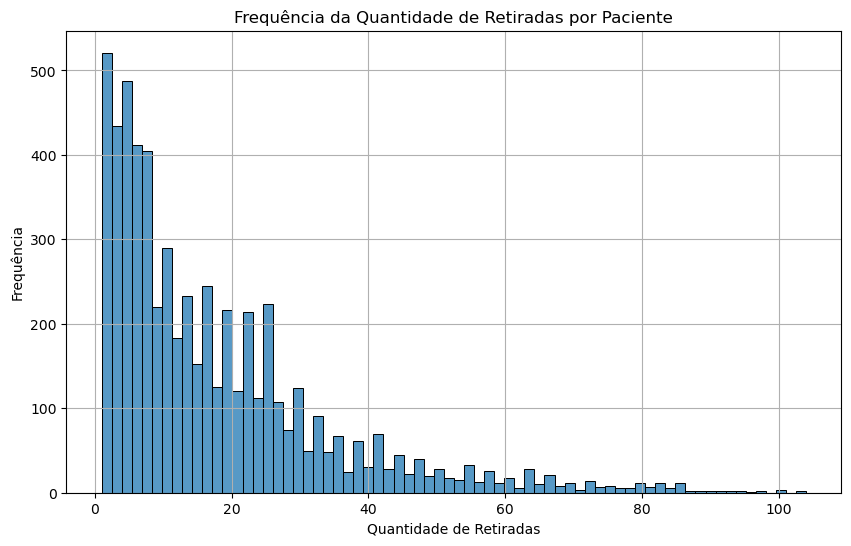

In [533]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# rj_epilepsia_total["numero_cns_paciente"].value_counts().sort_values()
retiradas_por_paciente = rj_epilepsia_total.groupby('numero_cns_paciente').size()

plt.figure(figsize=(10, 6))
sns.histplot(retiradas_por_paciente, bins=70, kde=False)
plt.title('Frequência da Quantidade de Retiradas por Paciente')
plt.xlabel('Quantidade de Retiradas')
plt.ylabel('Frequência')
plt.grid(True)
plt.savefig('../TCC Latex/images/frequencia_quantidade_retiradas_por_paciente.png')
plt.show()

In [534]:
retiradas_por_paciente[retiradas_por_paciente > 3].size

4896

In [535]:
rj_epilepsia_total.index = range(rj_epilepsia_total.shape[0])
rj_epilepsia_total = rj_epilepsia_total[rj_epilepsia_total["data_atendimento"] > data_inicio_estudo]
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_principal,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
1319,201402,201402,604500084,âäâ{{{üüä{ÇÇüâ,4,27,20140202,F,99,330455,...,G403,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,27 anos,27.0
1320,201402,201402,604500050,âäâ{{~{|{~ééé,4,33,20140202,F,99,330490,...,G403,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,São Gonçalo,2014-02-01,33 anos,33.0
1321,201402,201402,604500050,â{|~|}~Çâ{~ü,4,28,20131202,M,99,330385,...,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Paty do Alferes,2014-02-01,28 anos,28.0
1323,201402,201402,604500084,âäâ{{~|üÇüéâ,4,7,20140202,F,99,330455,...,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,7 anos,7.0
1324,201402,201402,604500050,âäâ{{|{||Ç}ÇÇ{|,4,53,20140102,F,99,330250,...,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Magé,2014-02-01,53 anos,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,G408,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,São Fidélis,2023-12-01,89 anos,89.0
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2023-12-01,61 anos,61.0
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Macaé,2023-12-01,17 anos,17.0
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,G403,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Itatiaia,2023-12-01,18 anos,18.0


In [536]:
# Contar o número de registros para cada paciente
contagem_registros_por_paciente = rj_epilepsia_total.groupby('numero_cns_paciente').size()

# Filtrar os pacientes que possuem pelo menos 3 registros
pacientes_com_3_ou_mais_registros = contagem_registros_por_paciente[contagem_registros_por_paciente >= 3].index

# Substituir o DataFrame original pelo resultado do filtro
rj_epilepsia_total = rj_epilepsia_total[rj_epilepsia_total['numero_cns_paciente'].isin(pacientes_com_3_ou_mais_registros)]
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_principal,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
1319,201402,201402,604500084,âäâ{{{üüä{ÇÇüâ,4,27,20140202,F,99,330455,...,G403,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,27 anos,27.0
1320,201402,201402,604500050,âäâ{{~{|{~ééé,4,33,20140202,F,99,330490,...,G403,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,São Gonçalo,2014-02-01,33 anos,33.0
1321,201402,201402,604500050,â{|~|}~Çâ{~ü,4,28,20131202,M,99,330385,...,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Paty do Alferes,2014-02-01,28 anos,28.0
1323,201402,201402,604500084,âäâ{{~|üÇüéâ,4,7,20140202,F,99,330455,...,G400,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,7 anos,7.0
1324,201402,201402,604500050,âäâ{{|{||Ç}ÇÇ{|,4,53,20140102,F,99,330250,...,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Magé,2014-02-01,53 anos,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,G408,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,São Fidélis,2023-12-01,89 anos,89.0
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2023-12-01,61 anos,61.0
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,G402,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Macaé,2023-12-01,17 anos,17.0
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,G403,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Itatiaia,2023-12-01,18 anos,18.0


# Análise Exploratória

## Por CID

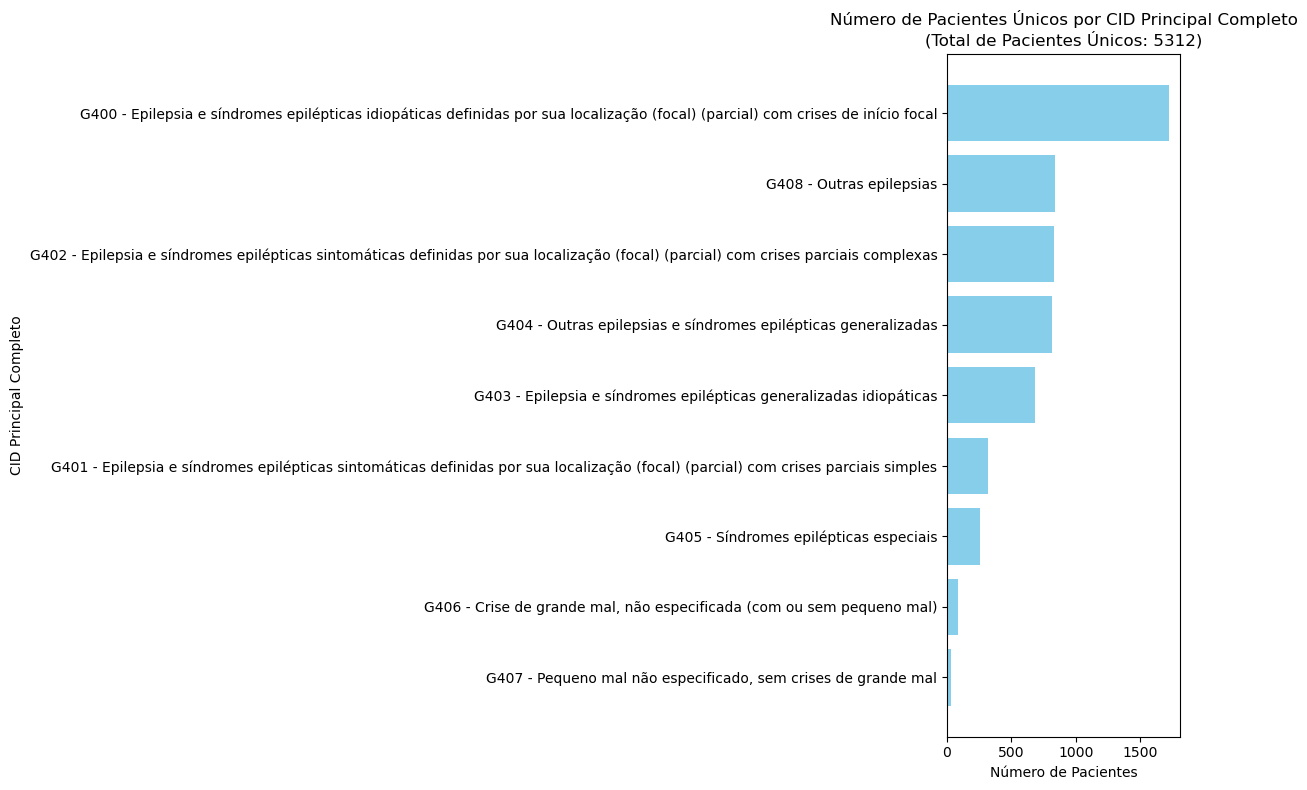

In [606]:
# Criar uma cópia do DataFrame para evitar o SettingWithCopyWarning
rj_epilepsia_total_copy = rj_epilepsia_total.copy()

# Criar a nova coluna 'cid_principal_extenso' mapeando os valores de 'cid_principal' para suas descrições
rj_epilepsia_total_copy['cid_principal_extenso'] = rj_epilepsia_total_copy['cid_principal'].map(cid_descriptions)

# Concatenar 'cid_principal' com 'cid_principal_extenso'
rj_epilepsia_total_copy['cid_principal_completo'] = rj_epilepsia_total_copy['cid_principal'] + " - " + rj_epilepsia_total_copy['cid_principal_extenso']

# Filtrar para pacientes únicos com base no numero_cns_paciente e cid_principal_completo
pacientes_unicos = rj_epilepsia_total_copy.drop_duplicates(subset=['numero_cns_paciente', 'cid_principal_completo'])

# Agrupar por cid_principal_completo e contar o número de pacientes únicos
contagem_cid_completo = pacientes_unicos.groupby('cid_principal_completo')['numero_cns_paciente'].nunique().reset_index()

# Renomear as colunas para clareza
contagem_cid_completo.columns = ['CID Principal Completo', 'Numero de Pacientes']

# Ordenar pela contagem de pacientes
contagem_cid_completo = contagem_cid_completo.sort_values(by='Numero de Pacientes', ascending=False)

# Calcular o total de pacientes únicos
total_pacientes_unicos_completo = pacientes_unicos['numero_cns_paciente'].nunique()

# Criar o gráfico de barras como figura
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(contagem_cid_completo['CID Principal Completo'], contagem_cid_completo['Numero de Pacientes'], color='skyblue')
ax.set_xlabel('Número de Pacientes')
ax.set_ylabel('CID Principal Completo')
ax.set_title(f'Número de Pacientes Únicos por CID Principal Completo\n(Total de Pacientes Únicos: {total_pacientes_unicos_completo})')
ax.invert_yaxis()  # Inverter o eixo y para que o maior valor fique no topo

# Ajustar layout e mostrar o gráfico
plt.tight_layout()

# Salvar o gráfico em um arquivo PNG
fig.savefig("../TCC Latex/images/contagem_cid_pacientes_unicos_completo.png")

# Mostrar o gráfico
plt.show()

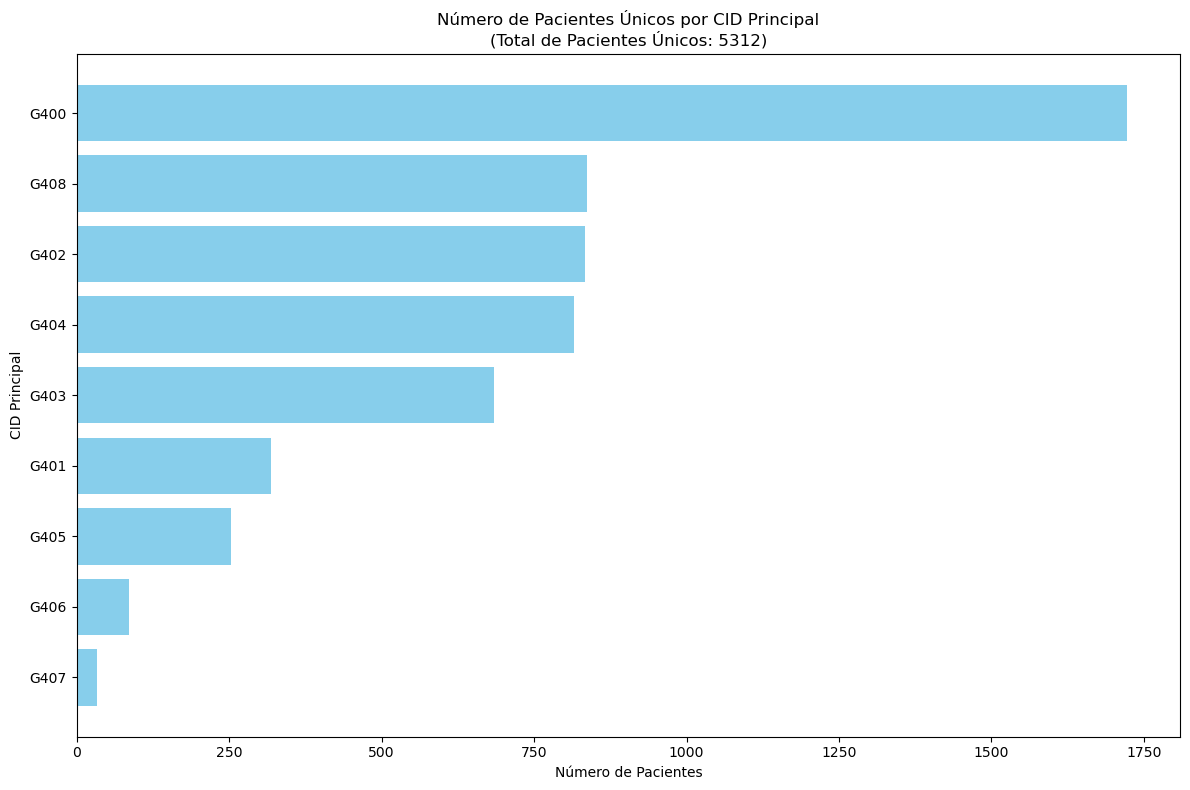

In [538]:
# Filtrar para pacientes únicos com base no numero_cns_paciente e cid_principal
pacientes_unicos = rj_epilepsia_total.drop_duplicates(subset=['numero_cns_paciente', 'cid_principal'])

# Agrupar por cid_principal e contar o número de pacientes únicos
contagem_cid = pacientes_unicos.groupby('cid_principal')['numero_cns_paciente'].nunique().reset_index()

# Renomear as colunas para clareza
contagem_cid.columns = ['CID Principal', 'Numero de Pacientes']

# Ordenar pela contagem de pacientes
contagem_cid = contagem_cid.sort_values(by='Numero de Pacientes', ascending=False)

# Calcular o total de pacientes únicos
total_pacientes_unicos = pacientes_unicos['numero_cns_paciente'].nunique()

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(contagem_cid['CID Principal'], contagem_cid['Numero de Pacientes'], color='skyblue')
plt.xlabel('Número de Pacientes')
plt.ylabel('CID Principal')
plt.title(f'Número de Pacientes Únicos por CID Principal\n(Total de Pacientes Únicos: {total_pacientes_unicos})')
plt.gca().invert_yaxis()  # Inverter o eixo y para que o maior valor fique no topo

# Mostrar o gráfico
plt.tight_layout()
plt.show()

# Salvar o gráfico em um arquivo PNG
fig.savefig("../TCC Latex/images/contagem_cid_pacientes_unicos.png")

## Por faixa etaria

### Menores de 18 anos

In [539]:
rj_menores_idade = rj_epilepsia_total.loc[rj_epilepsia_total['numero_idade'] < 18]
rj_menores_idade.index = range(rj_menores_idade.shape[0])
rj_menores_idade

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
0,201402,201402,604500084,âäâ{{~|üÇüéâ,4,7,20140202,F,99,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,7 anos,7.0,G400 - Epilepsia e síndromes epilépticas idiop...
1,201402,201402,604500050,â{|~|~{Ç|äéâ|,4,9,20131202,F,99,330490,...,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,São Gonçalo,2014-02-01,9 anos,9.0,G405 - Síndromes epilépticas especiais
2,201402,201402,604500068,â{|~|~éä~âé~ä,4,14,20131202,M,99,330330,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Outros,Topiramato 25 MG,Topiramato,Niterói,2014-02-01,14 anos,14.0,G401 - Epilepsia e síndromes epilépticas sinto...
3,201402,201402,604500084,é{{}{|ä}|~Ç}â,4,15,20140102,M,99,330414,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Queimados,2014-02-01,15 anos,15.0,G404 - Outras epilepsias e síndromes epiléptic...
4,201402,201402,604190018,âäâ{{||||~|~|}~,4,12,20140102,M,99,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Rio de Janeiro,2014-02-01,12 anos,12.0,G404 - Outras epilepsias e síndromes epiléptic...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,202312,202312,604500122,âäâ{{Ç|~éäâäâââ,4,7,20231207,M,1,330490,...,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Levetiracetam,São Gonçalo,2023-12-01,7 anos,7.0,G405 - Síndromes epilépticas especiais
23311,202312,202312,604500122,é{}{{ä~ü|}}Çâä,4,5,20231024,M,3,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Levetiracetam,Rio de Janeiro,2023-12-01,5 anos,5.0,G404 - Outras epilepsias e síndromes epiléptic...
23312,202312,202312,604190018,é{}~{||üÇâ{{|ä,4,12,20230721,F,1,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Rio de Janeiro,2023-12-01,12 anos,12.0,G404 - Outras epilepsias e síndromes epiléptic...
23313,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Macaé,2023-12-01,17 anos,17.0,G402 - Epilepsia e síndromes epilépticas sinto...


In [540]:
rj_menores_idade.drop_duplicates('numero_cns_paciente')

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
0,201402,201402,604500084,âäâ{{~|üÇüéâ,4,7,20140202,F,99,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,7 anos,7.0,G400 - Epilepsia e síndromes epilépticas idiop...
1,201402,201402,604500050,â{|~|~{Ç|äéâ|,4,9,20131202,F,99,330490,...,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,São Gonçalo,2014-02-01,9 anos,9.0,G405 - Síndromes epilépticas especiais
2,201402,201402,604500068,â{|~|~éä~âé~ä,4,14,20131202,M,99,330330,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Outros,Topiramato 25 MG,Topiramato,Niterói,2014-02-01,14 anos,14.0,G401 - Epilepsia e síndromes epilépticas sinto...
3,201402,201402,604500084,é{{}{|ä}|~Ç}â,4,15,20140102,M,99,330414,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Queimados,2014-02-01,15 anos,15.0,G404 - Outras epilepsias e síndromes epiléptic...
4,201402,201402,604190018,âäâ{{||||~|~|}~,4,12,20140102,M,99,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Rio de Janeiro,2014-02-01,12 anos,12.0,G404 - Outras epilepsias e síndromes epiléptic...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22383,202310,202310,604500122,é{{|{~äâää~|}{,4,5,20230911,F,3,330030,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Levetiracetam,Barra do Piraí,2023-10-01,5 anos,5.0,G400 - Epilepsia e síndromes epilépticas idiop...
22398,202310,202310,604500068,âäâ{{äüü{âäéÇ,4,7,20230925,M,1,330580,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Topiramato 25 MG,Topiramato,Teresópolis,2023-10-01,7 anos,7.0,G404 - Outras epilepsias e síndromes epiléptic...
22431,202310,202310,604500122,âäâ{{Ç|}â}{üä,4,7,20230814,F,1,330340,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Levetiracetam,Nova Friburgo,2023-10-01,7 anos,7.0,G400 - Epilepsia e síndromes epilépticas idiop...
22450,202310,202310,604500106,é{üä{â|éü}é|{~,4,15,20230829,F,3,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Rio de Janeiro,2023-10-01,15 anos,15.0,G400 - Epilepsia e síndromes epilépticas idiop...


### Maiores de 18 anos

In [541]:
rj_maiores_idade = rj_epilepsia_total.loc[rj_epilepsia_total['numero_idade'] > 18]
rj_maiores_idade.index = range(rj_maiores_idade.shape[0])
rj_maiores_idade

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
0,201402,201402,604500084,âäâ{{{üüä{ÇÇüâ,4,27,20140202,F,99,330455,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,27 anos,27.0,G403 - Epilepsia e síndromes epilépticas gener...
1,201402,201402,604500050,âäâ{{~{|{~ééé,4,33,20140202,F,99,330490,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,São Gonçalo,2014-02-01,33 anos,33.0,G403 - Epilepsia e síndromes epilépticas gener...
2,201402,201402,604500050,â{|~|}~Çâ{~ü,4,28,20131202,M,99,330385,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Paty do Alferes,2014-02-01,28 anos,28.0,G400 - Epilepsia e síndromes epilépticas idiop...
3,201402,201402,604500050,âäâ{{|{||Ç}ÇÇ{|,4,53,20140102,F,99,330250,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Magé,2014-02-01,53 anos,53.0,G402 - Epilepsia e síndromes epilépticas sinto...
4,201402,201402,604500084,âäâ{Ç{{Ç}äéä{},4,62,20140102,F,99,330100,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Campos dos Goytacazes,2014-02-01,62 anos,62.0,G408 - Outras epilepsias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75857,202312,202312,604500050,é{{Ç{Çä{||{éÇé,4,34,20230901,M,4,330190,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Itaboraí,2023-12-01,34 anos,34.0,G404 - Outras epilepsias e síndromes epiléptic...
75858,202312,202312,604500050,âäâ{{|}ä{{ä|ü}é,4,24,20231027,M,3,330170,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Duque de Caxias,2023-12-01,24 anos,24.0,G403 - Epilepsia e síndromes epilépticas gener...
75859,202312,202312,604500106,é{}Ç{â~~Ç~Ç~ü~,4,19,20231206,F,1,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Rio de Janeiro,2023-12-01,19 anos,19.0,G400 - Epilepsia e síndromes epilépticas idiop...
75860,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,São Fidélis,2023-12-01,89 anos,89.0,G408 - Outras epilepsias


In [542]:
rj_maiores_idade.drop_duplicates('numero_cns_paciente')

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
0,201402,201402,604500084,âäâ{{{üüä{ÇÇüâ,4,27,20140202,F,99,330455,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,27 anos,27.0,G403 - Epilepsia e síndromes epilépticas gener...
1,201402,201402,604500050,âäâ{{~{|{~ééé,4,33,20140202,F,99,330490,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,São Gonçalo,2014-02-01,33 anos,33.0,G403 - Epilepsia e síndromes epilépticas gener...
2,201402,201402,604500050,â{|~|}~Çâ{~ü,4,28,20131202,M,99,330385,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Paty do Alferes,2014-02-01,28 anos,28.0,G400 - Epilepsia e síndromes epilépticas idiop...
3,201402,201402,604500050,âäâ{{|{||Ç}ÇÇ{|,4,53,20140102,F,99,330250,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Magé,2014-02-01,53 anos,53.0,G402 - Epilepsia e síndromes epilépticas sinto...
4,201402,201402,604500084,âäâ{Ç{{Ç}äéä{},4,62,20140102,F,99,330100,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Campos dos Goytacazes,2014-02-01,62 anos,62.0,G408 - Outras epilepsias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74953,202312,202312,604500050,âäâ{{|{{}}ÇÇéÇ,4,19,20230927,M,1,330030,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Barra do Piraí,2023-12-01,19 anos,19.0,G403 - Epilepsia e síndromes epilépticas gener...
74994,202312,202312,604500076,é{}ü{Çééâ{}üé,4,19,20231214,F,1,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,Rio de Janeiro,2023-12-01,19 anos,19.0,G404 - Outras epilepsias e síndromes epiléptic...
75191,202312,202312,604500122,âäâ{{{}~{}â{~ä,4,19,20231114,F,3,330510,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Levetiracetam,São João de Meriti,2023-12-01,19 anos,19.0,G403 - Epilepsia e síndromes epilépticas gener...
75302,202312,202312,604500106,é{~{Ç}{Çä{é|ü,4,19,20231023,M,1,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Rio de Janeiro,2023-12-01,19 anos,19.0,G404 - Outras epilepsias e síndromes epiléptic...


## Por Municipio de Residencia

In [543]:
# Criando um DF com o Municipio de residencia e CNS apenas

colunas = ['codigo_uf_municipio_residencia_extenso', 'numero_cns_paciente']
contagem_municipios = rj_epilepsia_total.filter(items=colunas)
contagem_municipios

,codigo_uf_municipio_residencia_extenso,numero_cns_paciente
1319,Rio de Janeiro,âäâ{{{üüä{ÇÇüâ
1320,São Gonçalo,âäâ{{~{|{~ééé
1321,Paty do Alferes,â{|~|}~Çâ{~ü
1323,Rio de Janeiro,âäâ{{~|üÇüéâ
1324,Magé,âäâ{{|{||Ç}ÇÇ{|
...,...,...
103525,São Fidélis,é{âÇ{}~üâÇâ}{éÇ
103526,Rio de Janeiro,é{}ä{|Ç{äâ|}Çé
103527,Macaé,é{âÇ{}~}|éÇéüéé
103528,Itatiaia,é{|â{â}ä~äé{


In [544]:
contagem_municipios = contagem_municipios.drop_duplicates('numero_cns_paciente')
contagem_municipios

,codigo_uf_municipio_residencia_extenso,numero_cns_paciente
1319,Rio de Janeiro,âäâ{{{üüä{ÇÇüâ
1320,São Gonçalo,âäâ{{~{|{~ééé
1321,Paty do Alferes,â{|~|}~Çâ{~ü
1323,Rio de Janeiro,âäâ{{~|üÇüéâ
1324,Magé,âäâ{{|{||Ç}ÇÇ{|
...,...,...
99899,Nova Friburgo,âäâ{{Ç|}â}{üä
99969,Rio de Janeiro,é{üä{â|éü}é|{~
99971,Volta Redonda,é{}{é{~|âé}ä}Ç
99987,Rio de Janeiro,é{Ç{{âä|ää~Ç{


In [545]:
# Contagem de Medicamentos Totais

contagem_municipios.groupby('codigo_uf_municipio_residencia_extenso').count()

,numero_cns_paciente
codigo_uf_municipio_residencia_extenso,
Angra dos Reis,38
Aperibé,5
Araruama,4
Areal,7
Armação dos Búzios,11
...,...
Três Rios,29
Valença,59
Varre-Sai,45


In [546]:
# Export

contagem_municipios.groupby('codigo_uf_municipio_residencia_extenso').count().to_csv('../Dados/Base atualizada/contagem_municipios.csv', sep =';')

## Por sexo

### Feminino

In [547]:
sexo = ['F']
selecao = rj_epilepsia_total['sexo_paciente'].isin(sexo)

In [548]:
sexo_fem = rj_epilepsia_total[selecao]
sexo_fem

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
1319,201402,201402,604500084,âäâ{{{üüä{ÇÇüâ,4,27,20140202,F,99,330455,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,27 anos,27.0,G403 - Epilepsia e síndromes epilépticas gener...
1320,201402,201402,604500050,âäâ{{~{|{~ééé,4,33,20140202,F,99,330490,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,São Gonçalo,2014-02-01,33 anos,33.0,G403 - Epilepsia e síndromes epilépticas gener...
1323,201402,201402,604500084,âäâ{{~|üÇüéâ,4,7,20140202,F,99,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,7 anos,7.0,G400 - Epilepsia e síndromes epilépticas idiop...
1324,201402,201402,604500050,âäâ{{|{||Ç}ÇÇ{|,4,53,20140102,F,99,330250,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Magé,2014-02-01,53 anos,53.0,G402 - Epilepsia e síndromes epilépticas sinto...
1325,201402,201402,604500084,âäâ{Ç{{Ç}äéä{},4,62,20140102,F,99,330100,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Campos dos Goytacazes,2014-02-01,62 anos,62.0,G408 - Outras epilepsias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103520,202312,202312,604500106,é{}Ç{â~~Ç~Ç~ü~,4,19,20231206,F,1,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Rio de Janeiro,2023-12-01,19 anos,19.0,G400 - Epilepsia e síndromes epilépticas idiop...
103524,202312,202312,604190018,é{}~{||üÇâ{{|ä,4,12,20230721,F,1,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Rio de Janeiro,2023-12-01,12 anos,12.0,G404 - Outras epilepsias e síndromes epiléptic...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,São Fidélis,2023-12-01,89 anos,89.0,G408 - Outras epilepsias
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2023-12-01,61 anos,61.0,G402 - Epilepsia e síndromes epilépticas sinto...


In [549]:
sexo_fem.index = range(sexo_fem.shape[0])
sexo_fem

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
0,201402,201402,604500084,âäâ{{{üüä{ÇÇüâ,4,27,20140202,F,99,330455,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,27 anos,27.0,G403 - Epilepsia e síndromes epilépticas gener...
1,201402,201402,604500050,âäâ{{~{|{~ééé,4,33,20140202,F,99,330490,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,São Gonçalo,2014-02-01,33 anos,33.0,G403 - Epilepsia e síndromes epilépticas gener...
2,201402,201402,604500084,âäâ{{~|üÇüéâ,4,7,20140202,F,99,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,7 anos,7.0,G400 - Epilepsia e síndromes epilépticas idiop...
3,201402,201402,604500050,âäâ{{|{||Ç}ÇÇ{|,4,53,20140102,F,99,330250,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Magé,2014-02-01,53 anos,53.0,G402 - Epilepsia e síndromes epilépticas sinto...
4,201402,201402,604500084,âäâ{Ç{{Ç}äéä{},4,62,20140102,F,99,330100,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Campos dos Goytacazes,2014-02-01,62 anos,62.0,G408 - Outras epilepsias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54082,202312,202312,604500106,é{}Ç{â~~Ç~Ç~ü~,4,19,20231206,F,1,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Rio de Janeiro,2023-12-01,19 anos,19.0,G400 - Epilepsia e síndromes epilépticas idiop...
54083,202312,202312,604190018,é{}~{||üÇâ{{|ä,4,12,20230721,F,1,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Rio de Janeiro,2023-12-01,12 anos,12.0,G404 - Outras epilepsias e síndromes epiléptic...
54084,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,São Fidélis,2023-12-01,89 anos,89.0,G408 - Outras epilepsias
54085,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2023-12-01,61 anos,61.0,G402 - Epilepsia e síndromes epilépticas sinto...


In [550]:
# Export

sexo_fem.to_csv('../Dados/Base atualizada/rj_pacientes_fem.csv', sep =';')

### Masculino

In [551]:
sexo = ['M']
selecao = rj_epilepsia_total['sexo_paciente'].isin(sexo)

In [552]:
sexo_masc = rj_epilepsia_total[selecao]
sexo_masc

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
1321,201402,201402,604500050,â{|~|}~Çâ{~ü,4,28,20131202,M,99,330385,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Paty do Alferes,2014-02-01,28 anos,28.0,G400 - Epilepsia e síndromes epilépticas idiop...
1329,201402,201402,604500068,â{|~|~éä~âé~ä,4,14,20131202,M,99,330330,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Outros,Topiramato 25 MG,Topiramato,Niterói,2014-02-01,14 anos,14.0,G401 - Epilepsia e síndromes epilépticas sinto...
1334,201402,201402,604500084,é{{}{|ä}|~Ç}â,4,15,20140102,M,99,330414,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Queimados,2014-02-01,15 anos,15.0,G404 - Outras epilepsias e síndromes epiléptic...
1335,201402,201402,604500050,âäâ{{{âäÇé~Ç,4,20,20140102,M,99,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2014-02-01,20 anos,20.0,G404 - Outras epilepsias e síndromes epiléptic...
1336,201402,201402,604500050,|}üé}{|ü{â{{{,4,36,20131202,M,99,330470,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Santo Antônio de Pádua,2014-02-01,36 anos,36.0,G400 - Epilepsia e síndromes epilépticas idiop...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103519,202312,202312,604500106,é{}|{äâ|ä}Ç~é{,4,18,20230914,M,1,330452,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Rio das Ostras,2023-12-01,18 anos,18.0,G404 - Outras epilepsias e síndromes epiléptic...
103521,202312,202312,604500122,âäâ{{Ç|~éäâäâââ,4,7,20231207,M,1,330490,...,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Levetiracetam,São Gonçalo,2023-12-01,7 anos,7.0,G405 - Síndromes epilépticas especiais
103523,202312,202312,604500122,é{}{{ä~ü|}}Çâä,4,5,20231024,M,3,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Levetiracetam,Rio de Janeiro,2023-12-01,5 anos,5.0,G404 - Outras epilepsias e síndromes epiléptic...
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Macaé,2023-12-01,17 anos,17.0,G402 - Epilepsia e síndromes epilépticas sinto...


In [553]:
sexo_masc.index = range(sexo_masc.shape[0])
sexo_masc

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
0,201402,201402,604500050,â{|~|}~Çâ{~ü,4,28,20131202,M,99,330385,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Paty do Alferes,2014-02-01,28 anos,28.0,G400 - Epilepsia e síndromes epilépticas idiop...
1,201402,201402,604500068,â{|~|~éä~âé~ä,4,14,20131202,M,99,330330,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Outros,Topiramato 25 MG,Topiramato,Niterói,2014-02-01,14 anos,14.0,G401 - Epilepsia e síndromes epilépticas sinto...
2,201402,201402,604500084,é{{}{|ä}|~Ç}â,4,15,20140102,M,99,330414,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Queimados,2014-02-01,15 anos,15.0,G404 - Outras epilepsias e síndromes epiléptic...
3,201402,201402,604500050,âäâ{{{âäÇé~Ç,4,20,20140102,M,99,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2014-02-01,20 anos,20.0,G404 - Outras epilepsias e síndromes epiléptic...
4,201402,201402,604500050,|}üé}{|ü{â{{{,4,36,20131202,M,99,330470,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Santo Antônio de Pádua,2014-02-01,36 anos,36.0,G400 - Epilepsia e síndromes epilépticas idiop...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47012,202312,202312,604500106,é{}|{äâ|ä}Ç~é{,4,18,20230914,M,1,330452,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Rio das Ostras,2023-12-01,18 anos,18.0,G404 - Outras epilepsias e síndromes epiléptic...
47013,202312,202312,604500122,âäâ{{Ç|~éäâäâââ,4,7,20231207,M,1,330490,...,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Levetiracetam,São Gonçalo,2023-12-01,7 anos,7.0,G405 - Síndromes epilépticas especiais
47014,202312,202312,604500122,é{}{{ä~ü|}}Çâä,4,5,20231024,M,3,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Levetiracetam,Rio de Janeiro,2023-12-01,5 anos,5.0,G404 - Outras epilepsias e síndromes epiléptic...
47015,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Macaé,2023-12-01,17 anos,17.0,G402 - Epilepsia e síndromes epilépticas sinto...


In [554]:
# Export

sexo_masc.to_csv('../Dados/Base atualizada/rj_pacientes_masc.csv', sep =';')

### Sobre os sexos


In [555]:
# Criando um DF com o sexo e CNS apenas

colunas = ['sexo_paciente', 'numero_cns_paciente']
contagem_sexo = rj_epilepsia_total.filter(items=colunas)
contagem_sexo

,sexo_paciente,numero_cns_paciente
1319,F,âäâ{{{üüä{ÇÇüâ
1320,F,âäâ{{~{|{~ééé
1321,M,â{|~|}~Çâ{~ü
1323,F,âäâ{{~|üÇüéâ
1324,F,âäâ{{|{||Ç}ÇÇ{|
...,...,...
103525,F,é{âÇ{}~üâÇâ}{éÇ
103526,F,é{}ä{|Ç{äâ|}Çé
103527,M,é{âÇ{}~}|éÇéüéé
103528,F,é{|â{â}ä~äé{


In [556]:
contagem_sexo.drop_duplicates('numero_cns_paciente')

,sexo_paciente,numero_cns_paciente
1319,F,âäâ{{{üüä{ÇÇüâ
1320,F,âäâ{{~{|{~ééé
1321,M,â{|~|}~Çâ{~ü
1323,F,âäâ{{~|üÇüéâ
1324,F,âäâ{{|{||Ç}ÇÇ{|
...,...,...
99899,F,âäâ{{Ç|}â}{üä
99969,F,é{üä{â|éü}é|{~
99971,M,é{}{é{~|âé}ä}Ç
99987,F,é{Ç{{âä|ää~Ç{


In [557]:
sexo_pacientes_unicos = contagem_sexo.drop_duplicates('numero_cns_paciente')
sexo_pacientes_unicos.index = range(sexo_pacientes_unicos.shape[0])
sexo_pacientes_unicos

,sexo_paciente,numero_cns_paciente
0,F,âäâ{{{üüä{ÇÇüâ
1,F,âäâ{{~{|{~ééé
2,M,â{|~|}~Çâ{~ü
3,F,âäâ{{~|üÇüéâ
4,F,âäâ{{|{||Ç}ÇÇ{|
...,...,...
5307,F,âäâ{{Ç|}â}{üä
5308,F,é{üä{â|éü}é|{~
5309,M,é{}{é{~|âé}ä}Ç
5310,F,é{Ç{{âä|ää~Ç{


In [558]:
# Export

sexo_pacientes_unicos.to_csv('../Dados/Base atualizada/rj_sexo_pacientes_unicos.csv', sep =';')

In [559]:
# Contagem de Pacientes Unicos por sexo

contagem_sexo.drop_duplicates('numero_cns_paciente').groupby('sexo_paciente').count()

,numero_cns_paciente
sexo_paciente,
F,2930
M,2382


In [560]:
# Export

contagem_sexo.to_csv('../Dados/Base atualizada/rj_quantidade_pacientes_masc_fem.csv', sep =';')

In [561]:
contagem_sexo.drop_duplicates('numero_cns_paciente').groupby('sexo_paciente').count().to_csv('../Dados/Base atualizada/rj_quantidade_pacientes_masc_fem_unicosss.csv', sep =';')

## Por mes de atendimento

### Por mês de atendimento (paciente x mes)

In [562]:
# Tabela com os pacientes unicos nas linhas e as datas dos procedimentos nas colunas

pacientes_data_atendimento = pd.pivot_table(rj_epilepsia_total, values='sexo_paciente', index=['numero_cns_paciente'],
                       columns=['data_atendimento'], aggfunc='count', fill_value=0)
pacientes_data_atendimento

data_atendimento,2014-02-01,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,...,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01
numero_cns_paciente,,,,,,,,,,,,,,,,,,,,,
|{{|{â{äâü|{{|â,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
|{{|ä}{ÇÇ~{{{,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
|{{}~ââéâ{{|â,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
|{{Ç|äâ}éü}{{{,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
|{{äéé|Ç}{{{{},0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
é{üé{âÇââüü~||,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
é{üé{äÇä~Ç~â|Ç,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
é{üé{ééä|Ç}}{,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0


### Por mês de atendimento (medicamento x mes)

In [563]:
# Export

pacientes_data_atendimento.to_csv('../Dados/Base atualizada/rj_pacientes_unicos_data_atendimento.csv', sep =';')

In [564]:
# Tabela com os pacientes unicos nas linhas e as datas dos procedimentos nas colunas

procedimento_mes_atendimento = pd.pivot_table(rj_epilepsia_total, values='numero_cns_paciente', index=['procedimento_principal_unico'],
                       columns=['data_atendimento'], aggfunc='count', fill_value=0)
procedimento_mes_atendimento

data_atendimento,2014-02-01,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,...,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01
procedimento_principal_unico,,,,,,,,,,,,,,,,,,,,,
Gabapentina,110,193,228,220,218,96,60,50,50,211,...,78,62,78,76,74,76,73,78,75,77
Lamotrigina,558,554,567,573,554,221,111,87,72,92,...,525,528,526,525,541,561,574,591,589,582
Levetiracetam,0,0,0,0,0,0,0,0,0,0,...,474,487,543,545,546,559,646,705,695,619
Topiramato,572,546,566,601,609,633,585,602,651,615,...,285,292,309,286,293,312,313,314,333,330
Vigabatrina,94,108,109,107,106,113,75,37,20,25,...,80,85,91,81,70,54,43,28,21,19


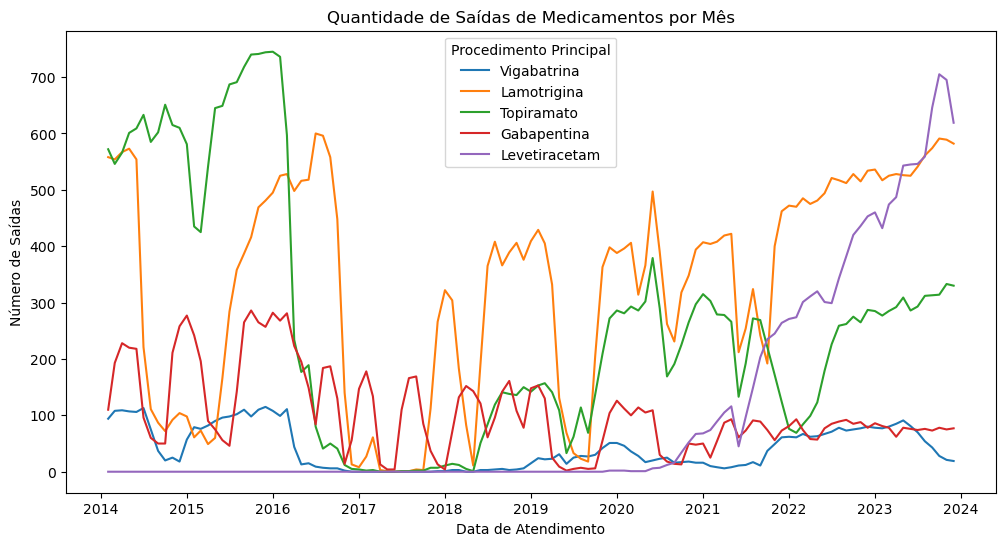

In [565]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a lista de procedimentos principais únicos
procedimentos = ['Vigabatrina', 'Lamotrigina', 'Topiramato', 'Gabapentina', 'Levetiracetam']

# Converte as colunas de datas para o formato datetime
procedimento_mes_atendimento.columns = pd.to_datetime(procedimento_mes_atendimento.columns)

# Cria a figura e os eixos
plt.figure(figsize=(12, 6))

# Plota uma linha para cada procedimento
for procedimento in procedimentos:
    if procedimento in procedimento_mes_atendimento.index:
        plt.plot(procedimento_mes_atendimento.columns, 
                 procedimento_mes_atendimento.loc[procedimento], 
                 label=procedimento)

# Adiciona título e rótulos aos eixos
plt.title('Quantidade de Saídas de Medicamentos por Mês')
plt.xlabel('Data de Atendimento')
plt.ylabel('Número de Saídas')
plt.legend(title='Procedimento Principal')

# Salva o gráfico
plt.savefig('../TCC Latex/images/saida_medicamentos_por_mes.png')

# Mostra o gráfico
plt.show()


In [566]:
# Export

procedimento_mes_atendimento.to_csv('../Dados/Base atualizada/rj_medicamentos_mes.csv', sep =';')

## Sobre o tratamento

### Pacientes por tipo motivo de saida

In [567]:
# Criando um DF com o Motivo de saida e CNS apenas

colunas = ['motivo_saida_permanencia_extenso', 'numero_cns_paciente']
contagem_tratamento = rj_epilepsia_total.filter(items=colunas)
contagem_tratamento

,motivo_saida_permanencia_extenso,numero_cns_paciente
1319,Permanencia_Caracteristicas_Doenca,âäâ{{{üüä{ÇÇüâ
1320,Permanencia_Caracteristicas_Doenca,âäâ{{~{|{~ééé
1321,Permanencia_Caracteristicas_Doenca,â{|~|}~Çâ{~ü
1323,Permanencia_Caracteristicas_Doenca,âäâ{{~|üÇüéâ
1324,Permanencia_Caracteristicas_Doenca,âäâ{{|{||Ç}ÇÇ{|
...,...,...
103525,Permanencia_Caracteristicas_Doenca,é{âÇ{}~üâÇâ}{éÇ
103526,Permanencia_Caracteristicas_Doenca,é{}ä{|Ç{äâ|}Çé
103527,Permanencia_Caracteristicas_Doenca,é{âÇ{}~}|éÇéüéé
103528,Permanencia_Caracteristicas_Doenca,é{|â{â}ä~äé{


In [568]:
# Contagem de Motivos de saida Totais

contagem_tratamento.groupby('motivo_saida_permanencia_extenso').count()

,numero_cns_paciente
motivo_saida_permanencia_extenso,
Encerramento_Administrativo,3230
Obito_Declaracao_Medico_Assistente,1
Obito_Declaracao_SVO,1
Permanencia_Caracteristicas_Doenca,94072
Permanencia_Outros,3797
Transferencia_Outro_Estabelecimento,3


In [569]:
# Export

contagem_tratamento.groupby('motivo_saida_permanencia_extenso').count().to_csv('../Dados/Base atualizada/contagem_motivo_saida_total.csv', sep =';')

### Pacientes por tipo de medicamento

In [570]:
# Criando um DF com o medicamento e CNS apenas

colunas = ['procedimento_principal_unico', 'numero_cns_paciente']
contagem_tratamento = rj_epilepsia_total.filter(items=colunas)
contagem_tratamento

,procedimento_principal_unico,numero_cns_paciente
1319,Topiramato,âäâ{{{üüä{ÇÇüâ
1320,Lamotrigina,âäâ{{~{|{~ééé
1321,Lamotrigina,â{|~|}~Çâ{~ü
1323,Topiramato,âäâ{{~|üÇüéâ
1324,Lamotrigina,âäâ{{|{||Ç}ÇÇ{|
...,...,...
103525,Topiramato,é{âÇ{}~üâÇâ}{éÇ
103526,Lamotrigina,é{}ä{|Ç{äâ|}Çé
103527,Levetiracetam,é{âÇ{}~}|éÇéüéé
103528,Levetiracetam,é{|â{â}ä~äé{


In [571]:
# Contagem de Medicamentos Totais

contagem_tratamento.groupby('procedimento_principal_unico').count()

,numero_cns_paciente
procedimento_principal_unico,
Gabapentina,12458
Lamotrigina,39592
Levetiracetam,12715
Topiramato,31504
Vigabatrina,4835


In [572]:
# Export

contagem_tratamento.groupby('procedimento_principal_unico').count().to_csv('../Dados/Base atualizada/contagem_medicamentos.csv', sep =';')

#### Topiramato

In [573]:
topiramato = [604500076, 604500084, 604500068]
selecao = rj_epilepsia_total['procedimento_principal'].isin(topiramato)

In [574]:
pacientes_topiramato = rj_epilepsia_total[selecao]
pacientes_topiramato

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
1319,201402,201402,604500084,âäâ{{{üüä{ÇÇüâ,4,27,20140202,F,99,330455,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,27 anos,27.0,G403 - Epilepsia e síndromes epilépticas gener...
1323,201402,201402,604500084,âäâ{{~|üÇüéâ,4,7,20140202,F,99,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,7 anos,7.0,G400 - Epilepsia e síndromes epilépticas idiop...
1325,201402,201402,604500084,âäâ{Ç{{Ç}äéä{},4,62,20140102,F,99,330100,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Campos dos Goytacazes,2014-02-01,62 anos,62.0,G408 - Outras epilepsias
1328,201402,201402,604500084,â{|~~{{ü|||,4,45,20140202,F,99,330420,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Resende,2014-02-01,45 anos,45.0,G403 - Epilepsia e síndromes epilépticas gener...
1329,201402,201402,604500068,â{|~|~éä~âé~ä,4,14,20131202,M,99,330330,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Outros,Topiramato 25 MG,Topiramato,Niterói,2014-02-01,14 anos,14.0,G401 - Epilepsia e síndromes epilépticas sinto...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103512,202312,202312,604500076,é{Ç{{â}}{}âééÇ|,4,41,20231127,F,3,330250,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,Magé,2023-12-01,41 anos,41.0,G400 - Epilepsia e síndromes epilépticas idiop...
103513,202312,202312,604500084,é{{{{|~ü|~}{â,4,28,20231002,F,3,330420,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Resende,2023-12-01,28 anos,28.0,G400 - Epilepsia e síndromes epilépticas idiop...
103514,202312,202312,604500084,é{éü{}{|{Ç|âä~,4,20,20230607,F,1,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2023-12-01,20 anos,20.0,G400 - Epilepsia e síndromes epilépticas idiop...
103515,202312,202312,604500084,é{ü~{äéü|âéâé{,4,47,20230807,M,3,330455,...,0,"Crise de grande mal, não especificada (com ou ...",Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2023-12-01,47 anos,47.0,"G406 - Crise de grande mal, não especificada (..."


In [575]:
pacientes_topiramato.index = range(pacientes_topiramato.shape[0])
pacientes_topiramato

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
0,201402,201402,604500084,âäâ{{{üüä{ÇÇüâ,4,27,20140202,F,99,330455,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,27 anos,27.0,G403 - Epilepsia e síndromes epilépticas gener...
1,201402,201402,604500084,âäâ{{~|üÇüéâ,4,7,20140202,F,99,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,7 anos,7.0,G400 - Epilepsia e síndromes epilépticas idiop...
2,201402,201402,604500084,âäâ{Ç{{Ç}äéä{},4,62,20140102,F,99,330100,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Campos dos Goytacazes,2014-02-01,62 anos,62.0,G408 - Outras epilepsias
3,201402,201402,604500084,â{|~~{{ü|||,4,45,20140202,F,99,330420,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Resende,2014-02-01,45 anos,45.0,G403 - Epilepsia e síndromes epilépticas gener...
4,201402,201402,604500068,â{|~|~éä~âé~ä,4,14,20131202,M,99,330330,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Outros,Topiramato 25 MG,Topiramato,Niterói,2014-02-01,14 anos,14.0,G401 - Epilepsia e síndromes epilépticas sinto...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31499,202312,202312,604500076,é{Ç{{â}}{}âééÇ|,4,41,20231127,F,3,330250,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,Magé,2023-12-01,41 anos,41.0,G400 - Epilepsia e síndromes epilépticas idiop...
31500,202312,202312,604500084,é{{{{|~ü|~}{â,4,28,20231002,F,3,330420,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Resende,2023-12-01,28 anos,28.0,G400 - Epilepsia e síndromes epilépticas idiop...
31501,202312,202312,604500084,é{éü{}{|{Ç|âä~,4,20,20230607,F,1,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2023-12-01,20 anos,20.0,G400 - Epilepsia e síndromes epilépticas idiop...
31502,202312,202312,604500084,é{ü~{äéü|âéâé{,4,47,20230807,M,3,330455,...,0,"Crise de grande mal, não especificada (com ou ...",Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2023-12-01,47 anos,47.0,"G406 - Crise de grande mal, não especificada (..."


In [576]:
# Export

pacientes_topiramato.to_csv('../Dados/Base atualizada/rj_pacientes_topiramato.csv', sep =';')

#### Vigabatrina

In [577]:
vigabatrina = [604190018]
selecao = rj_epilepsia_total['procedimento_principal'].isin(vigabatrina)

In [578]:
pacientes_vigabatrina = rj_epilepsia_total[selecao]
pacientes_vigabatrina

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
1339,201402,201402,604190018,âäâ{{||||~|~|}~,4,12,20140102,M,99,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Rio de Janeiro,2014-02-01,12 anos,12.0,G404 - Outras epilepsias e síndromes epiléptic...
1367,201402,201402,604190018,âäâ{{}~é{â|ü}ü,4,3,20140102,F,99,330600,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Três Rios,2014-02-01,3 anos,3.0,G400 - Epilepsia e síndromes epilépticas idiop...
1368,201402,201402,604190018,â{|~~ÇÇ|~ä{é,4,30,20140202,M,99,330170,...,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Duque de Caxias,2014-02-01,30 anos,30.0,G405 - Síndromes epilépticas especiais
1399,201402,201402,604190018,â{|~|~Çé~äé,4,11,20131202,F,99,330040,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Barra Mansa,2014-02-01,11 anos,11.0,G404 - Outras epilepsias e síndromes epiléptic...
1445,201402,201402,604190018,âäâ{{~äü}|~{ü,4,3,20140102,M,99,330100,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Campos dos Goytacazes,2014-02-01,3 anos,3.0,G404 - Outras epilepsias e síndromes epiléptic...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103294,202312,202312,604190018,é{ü{|ü|ü|âÇ,4,2,20231108,M,2,330170,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Duque de Caxias,2023-12-01,2 anos,2.0,G404 - Outras epilepsias e síndromes epiléptic...
103390,202312,202312,604190018,é{{Ç{}äâüâüÇÇÇ{,4,17,20231003,M,3,330452,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Rio das Ostras,2023-12-01,17 anos,17.0,G404 - Outras epilepsias e síndromes epiléptic...
103404,202312,202312,604190018,é{{{{äé~~}|Ç{ü,4,2,20231201,F,3,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Rio de Janeiro,2023-12-01,2 anos,2.0,G400 - Epilepsia e síndromes epilépticas idiop...
103435,202312,202312,604190018,é{â{~~{üä~ââé{,4,2,20231003,F,3,330100,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Campos dos Goytacazes,2023-12-01,2 anos,2.0,G404 - Outras epilepsias e síndromes epiléptic...


In [579]:
pacientes_vigabatrina.index = range(pacientes_vigabatrina.shape[0])
pacientes_vigabatrina

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
0,201402,201402,604190018,âäâ{{||||~|~|}~,4,12,20140102,M,99,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Rio de Janeiro,2014-02-01,12 anos,12.0,G404 - Outras epilepsias e síndromes epiléptic...
1,201402,201402,604190018,âäâ{{}~é{â|ü}ü,4,3,20140102,F,99,330600,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Três Rios,2014-02-01,3 anos,3.0,G400 - Epilepsia e síndromes epilépticas idiop...
2,201402,201402,604190018,â{|~~ÇÇ|~ä{é,4,30,20140202,M,99,330170,...,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Duque de Caxias,2014-02-01,30 anos,30.0,G405 - Síndromes epilépticas especiais
3,201402,201402,604190018,â{|~|~Çé~äé,4,11,20131202,F,99,330040,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Barra Mansa,2014-02-01,11 anos,11.0,G404 - Outras epilepsias e síndromes epiléptic...
4,201402,201402,604190018,âäâ{{~äü}|~{ü,4,3,20140102,M,99,330100,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Campos dos Goytacazes,2014-02-01,3 anos,3.0,G404 - Outras epilepsias e síndromes epiléptic...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,202312,202312,604190018,é{ü{|ü|ü|âÇ,4,2,20231108,M,2,330170,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Duque de Caxias,2023-12-01,2 anos,2.0,G404 - Outras epilepsias e síndromes epiléptic...
4831,202312,202312,604190018,é{{Ç{}äâüâüÇÇÇ{,4,17,20231003,M,3,330452,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Rio das Ostras,2023-12-01,17 anos,17.0,G404 - Outras epilepsias e síndromes epiléptic...
4832,202312,202312,604190018,é{{{{äé~~}|Ç{ü,4,2,20231201,F,3,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Rio de Janeiro,2023-12-01,2 anos,2.0,G400 - Epilepsia e síndromes epilépticas idiop...
4833,202312,202312,604190018,é{â{~~{üä~ââé{,4,2,20231003,F,3,330100,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Vigabatrina,Campos dos Goytacazes,2023-12-01,2 anos,2.0,G404 - Outras epilepsias e síndromes epiléptic...


In [580]:
# Export

pacientes_vigabatrina.to_csv('../Dados/Base atualizada/rj_pacientes_vigabatrina.csv', sep =';')

#### Gabapentina

In [581]:
gabapentina = [604500017, 604500025]
selecao = rj_epilepsia_total['procedimento_principal'].isin(gabapentina)

In [582]:
pacientes_gabapentina = rj_epilepsia_total[selecao]
pacientes_gabapentina

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
1333,201402,201402,604500017,âäâ{{}~â{ü|äÇ,4,65,20140102,F,99,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Rio de Janeiro,2014-02-01,65 anos,65.0,G400 - Epilepsia e síndromes epilépticas idiop...
1340,201402,201402,604500017,âäâ{Ç{{ÇÇ~Çü~ü,4,77,20140202,M,99,330300,...,0,"Crise de grande mal, não especificada (com ou ...",Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Miracema,2014-02-01,77 anos,77.0,"G406 - Crise de grande mal, não especificada (..."
1341,201402,201402,604500017,âäâ{{|}âÇ}é}}~,4,70,20140202,F,99,330615,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Varre-Sai,2014-02-01,70 anos,70.0,G408 - Outras epilepsias
1374,201402,201402,604500017,é{{{{Çéäü{{~}{},4,55,20140202,F,99,330240,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Macaé,2014-02-01,55 anos,55.0,G400 - Epilepsia e síndromes epilépticas idiop...
1400,201402,201402,604500017,âäâ{{|}éä}Çâ}ä,4,58,20140202,F,99,330190,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Itaboraí,2014-02-01,58 anos,58.0,G400 - Epilepsia e síndromes epilépticas idiop...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103447,202312,202312,604500017,âäâ{{}ä{Çâé|}äâ,4,64,20231227,M,1,330455,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Rio de Janeiro,2023-12-01,64 anos,64.0,G402 - Epilepsia e síndromes epilépticas sinto...
103454,202312,202312,604500017,é{~{}âüÇ~Çä||,4,68,20231207,M,1,330220,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Itaperuna,2023-12-01,68 anos,68.0,G408 - Outras epilepsias
103455,202312,202312,604500017,é{â{}éÇüÇä{éüä,4,59,20231215,M,2,330450,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Rio das Flores,2023-12-01,59 anos,59.0,G400 - Epilepsia e síndromes epilépticas idiop...
103462,202312,202312,604500017,é{â{{}~ÇäÇ|ââ}â,4,52,20231218,F,3,330455,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Rio de Janeiro,2023-12-01,52 anos,52.0,G408 - Outras epilepsias


In [583]:
pacientes_gabapentina.index = range(pacientes_gabapentina.shape[0])
pacientes_gabapentina

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
0,201402,201402,604500017,âäâ{{}~â{ü|äÇ,4,65,20140102,F,99,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Rio de Janeiro,2014-02-01,65 anos,65.0,G400 - Epilepsia e síndromes epilépticas idiop...
1,201402,201402,604500017,âäâ{Ç{{ÇÇ~Çü~ü,4,77,20140202,M,99,330300,...,0,"Crise de grande mal, não especificada (com ou ...",Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Miracema,2014-02-01,77 anos,77.0,"G406 - Crise de grande mal, não especificada (..."
2,201402,201402,604500017,âäâ{{|}âÇ}é}}~,4,70,20140202,F,99,330615,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Varre-Sai,2014-02-01,70 anos,70.0,G408 - Outras epilepsias
3,201402,201402,604500017,é{{{{Çéäü{{~}{},4,55,20140202,F,99,330240,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Macaé,2014-02-01,55 anos,55.0,G400 - Epilepsia e síndromes epilépticas idiop...
4,201402,201402,604500017,âäâ{{|}éä}Çâ}ä,4,58,20140202,F,99,330190,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Itaboraí,2014-02-01,58 anos,58.0,G400 - Epilepsia e síndromes epilépticas idiop...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12453,202312,202312,604500017,âäâ{{}ä{Çâé|}äâ,4,64,20231227,M,1,330455,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Rio de Janeiro,2023-12-01,64 anos,64.0,G402 - Epilepsia e síndromes epilépticas sinto...
12454,202312,202312,604500017,é{~{}âüÇ~Çä||,4,68,20231207,M,1,330220,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Itaperuna,2023-12-01,68 anos,68.0,G408 - Outras epilepsias
12455,202312,202312,604500017,é{â{}éÇüÇä{éüä,4,59,20231215,M,2,330450,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Rio das Flores,2023-12-01,59 anos,59.0,G400 - Epilepsia e síndromes epilépticas idiop...
12456,202312,202312,604500017,é{â{{}~ÇäÇ|ââ}â,4,52,20231218,F,3,330455,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Gabapentina,Rio de Janeiro,2023-12-01,52 anos,52.0,G408 - Outras epilepsias


In [584]:
# Export

pacientes_gabapentina.to_csv('../Dados/Base atualizada/rj_pacientes_gabapentina.csv', sep =';')

#### Lamotrigina

In [585]:
lamotrigina = [604500050]
selecao = rj_epilepsia_total['procedimento_principal'].isin(lamotrigina)

In [586]:
pacientes_lamotrigina = rj_epilepsia_total[selecao]
pacientes_lamotrigina

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
1320,201402,201402,604500050,âäâ{{~{|{~ééé,4,33,20140202,F,99,330490,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,São Gonçalo,2014-02-01,33 anos,33.0,G403 - Epilepsia e síndromes epilépticas gener...
1321,201402,201402,604500050,â{|~|}~Çâ{~ü,4,28,20131202,M,99,330385,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Paty do Alferes,2014-02-01,28 anos,28.0,G400 - Epilepsia e síndromes epilépticas idiop...
1324,201402,201402,604500050,âäâ{{|{||Ç}ÇÇ{|,4,53,20140102,F,99,330250,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Magé,2014-02-01,53 anos,53.0,G402 - Epilepsia e síndromes epilépticas sinto...
1326,201402,201402,604500050,âäâ{{|}éÇüä{â}Ç,4,22,20140202,F,99,330510,...,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,São João de Meriti,2014-02-01,22 anos,22.0,G405 - Síndromes epilépticas especiais
1327,201402,201402,604500050,â{|~|~{Ç|äéâ|,4,9,20131202,F,99,330490,...,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,São Gonçalo,2014-02-01,9 anos,9.0,G405 - Síndromes epilépticas especiais
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103510,202312,202312,604500050,é{~ü{{{|{}~}~{,4,33,20231121,F,1,330455,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2023-12-01,33 anos,33.0,G401 - Epilepsia e síndromes epilépticas sinto...
103516,202312,202312,604500050,é{{Ç{Çä{||{éÇé,4,34,20230901,M,4,330190,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Itaboraí,2023-12-01,34 anos,34.0,G404 - Outras epilepsias e síndromes epiléptic...
103517,202312,202312,604500050,âäâ{{|}ä{{ä|ü}é,4,24,20231027,M,3,330170,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Duque de Caxias,2023-12-01,24 anos,24.0,G403 - Epilepsia e síndromes epilépticas gener...
103518,202312,202312,604500050,é{â{ä}éÇ}äüäüé,4,11,20231016,F,3,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2023-12-01,11 anos,11.0,G400 - Epilepsia e síndromes epilépticas idiop...


In [587]:
pacientes_lamotrigina.index = range(pacientes_lamotrigina.shape[0])
pacientes_lamotrigina

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
0,201402,201402,604500050,âäâ{{~{|{~ééé,4,33,20140202,F,99,330490,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,São Gonçalo,2014-02-01,33 anos,33.0,G403 - Epilepsia e síndromes epilépticas gener...
1,201402,201402,604500050,â{|~|}~Çâ{~ü,4,28,20131202,M,99,330385,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Paty do Alferes,2014-02-01,28 anos,28.0,G400 - Epilepsia e síndromes epilépticas idiop...
2,201402,201402,604500050,âäâ{{|{||Ç}ÇÇ{|,4,53,20140102,F,99,330250,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Magé,2014-02-01,53 anos,53.0,G402 - Epilepsia e síndromes epilépticas sinto...
3,201402,201402,604500050,âäâ{{|}éÇüä{â}Ç,4,22,20140202,F,99,330510,...,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,São João de Meriti,2014-02-01,22 anos,22.0,G405 - Síndromes epilépticas especiais
4,201402,201402,604500050,â{|~|~{Ç|äéâ|,4,9,20131202,F,99,330490,...,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,São Gonçalo,2014-02-01,9 anos,9.0,G405 - Síndromes epilépticas especiais
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39587,202312,202312,604500050,é{~ü{{{|{}~}~{,4,33,20231121,F,1,330455,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2023-12-01,33 anos,33.0,G401 - Epilepsia e síndromes epilépticas sinto...
39588,202312,202312,604500050,é{{Ç{Çä{||{éÇé,4,34,20230901,M,4,330190,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Itaboraí,2023-12-01,34 anos,34.0,G404 - Outras epilepsias e síndromes epiléptic...
39589,202312,202312,604500050,âäâ{{|}ä{{ä|ü}é,4,24,20231027,M,3,330170,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Duque de Caxias,2023-12-01,24 anos,24.0,G403 - Epilepsia e síndromes epilépticas gener...
39590,202312,202312,604500050,é{â{ä}éÇ}äüäüé,4,11,20231016,F,3,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2023-12-01,11 anos,11.0,G400 - Epilepsia e síndromes epilépticas idiop...


In [588]:
# Export

pacientes_lamotrigina.to_csv('../Dados/Base atualizada/rj_pacientes_lamotrigina.csv', sep =';')

#### Levetiracetam

In [589]:
levetiracetam = [604500092, 604500122 , 604500106, 604500114]
selecao = rj_epilepsia_total['procedimento_principal'].isin(levetiracetam)

In [590]:
pacientes_levetiracetam = rj_epilepsia_total[selecao]
pacientes_levetiracetam

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
51658,201912,201912,604500092,â{|~|~}|â,4,13,20191108,F,99,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 150 ML),Levetiracetam,Rio de Janeiro,2019-12-01,13 anos,13.0,G404 - Outras epilepsias e síndromes epiléptic...
51722,201912,201912,604500092,âäâ{{äééÇ{|},4,3,20191119,F,3,330455,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 150 ML),Levetiracetam,Rio de Janeiro,2019-12-01,3 anos,3.0,G408 - Outras epilepsias
51955,202001,202001,604500092,âäâ{{äééÇ{|},4,3,20191119,F,3,330455,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 150 ML),Levetiracetam,Rio de Janeiro,2020-01-01,3 anos,3.0,G408 - Outras epilepsias
52559,202001,202001,604500092,â{|~|~}|â,4,13,20191108,F,99,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 150 ML),Levetiracetam,Rio de Janeiro,2020-01-01,13 anos,13.0,G404 - Outras epilepsias e síndromes epiléptic...
52836,202002,202002,604500092,âäâ{{äééÇ{|},4,3,20191119,F,3,330455,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 150 ML),Levetiracetam,Rio de Janeiro,2020-02-01,3 anos,3.0,G408 - Outras epilepsias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103521,202312,202312,604500122,âäâ{{Ç|~éäâäâââ,4,7,20231207,M,1,330490,...,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Levetiracetam,São Gonçalo,2023-12-01,7 anos,7.0,G405 - Síndromes epilépticas especiais
103523,202312,202312,604500122,é{}{{ä~ü|}}Çâä,4,5,20231024,M,3,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Levetiracetam,Rio de Janeiro,2023-12-01,5 anos,5.0,G404 - Outras epilepsias e síndromes epiléptic...
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Macaé,2023-12-01,17 anos,17.0,G402 - Epilepsia e síndromes epilépticas sinto...
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Itatiaia,2023-12-01,18 anos,18.0,G403 - Epilepsia e síndromes epilépticas gener...


In [591]:
pacientes_levetiracetam.index = range(pacientes_levetiracetam.shape[0])
pacientes_levetiracetam

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
0,201912,201912,604500092,â{|~|~}|â,4,13,20191108,F,99,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 150 ML),Levetiracetam,Rio de Janeiro,2019-12-01,13 anos,13.0,G404 - Outras epilepsias e síndromes epiléptic...
1,201912,201912,604500092,âäâ{{äééÇ{|},4,3,20191119,F,3,330455,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 150 ML),Levetiracetam,Rio de Janeiro,2019-12-01,3 anos,3.0,G408 - Outras epilepsias
2,202001,202001,604500092,âäâ{{äééÇ{|},4,3,20191119,F,3,330455,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 150 ML),Levetiracetam,Rio de Janeiro,2020-01-01,3 anos,3.0,G408 - Outras epilepsias
3,202001,202001,604500092,â{|~|~}|â,4,13,20191108,F,99,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 150 ML),Levetiracetam,Rio de Janeiro,2020-01-01,13 anos,13.0,G404 - Outras epilepsias e síndromes epiléptic...
4,202002,202002,604500092,âäâ{{äééÇ{|},4,3,20191119,F,3,330455,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 150 ML),Levetiracetam,Rio de Janeiro,2020-02-01,3 anos,3.0,G408 - Outras epilepsias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12710,202312,202312,604500122,âäâ{{Ç|~éäâäâââ,4,7,20231207,M,1,330490,...,0,Síndromes epilépticas especiais,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Levetiracetam,São Gonçalo,2023-12-01,7 anos,7.0,G405 - Síndromes epilépticas especiais
12711,202312,202312,604500122,é{}{{ä~ü|}}Çâä,4,5,20231024,M,3,330455,...,0,Outras epilepsias e síndromes epilépticas gene...,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Levetiracetam,Rio de Janeiro,2023-12-01,5 anos,5.0,G404 - Outras epilepsias e síndromes epiléptic...
12712,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Macaé,2023-12-01,17 anos,17.0,G402 - Epilepsia e síndromes epilépticas sinto...
12713,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Itatiaia,2023-12-01,18 anos,18.0,G403 - Epilepsia e síndromes epilépticas gener...


In [592]:
# Export

pacientes_levetiracetam.to_csv('../Dados/Base atualizada/rj_pacientes_levetiracetam.csv', sep =';')

### Primeiro e último dia do tratamento

In [593]:
# Encontrar a primeira data de atendimento para cada paciente
primeira_data = rj_epilepsia_total.groupby('numero_cns_paciente').agg({'data_atendimento': 'min', 'sexo_paciente': 'first', 'numero_idade':'first'}).reset_index()
primeira_data.columns = ['numero_cns_paciente', 'primeira_data_atendimento', 'sexo_paciente', 'numero_idade']

In [594]:
# Encontrar a última data de atendimento para cada paciente
ultima_data = rj_epilepsia_total.groupby('numero_cns_paciente').agg({'data_atendimento': 'max'}).reset_index()
ultima_data.columns = ['numero_cns_paciente', 'ultima_data_atendimento']

In [595]:
# Mesclar os DataFrames das primeiras e últimas datas
datas_atendimento = pd.merge(primeira_data, ultima_data, on='numero_cns_paciente')
datas_atendimento

,numero_cns_paciente,primeira_data_atendimento,sexo_paciente,numero_idade,ultima_data_atendimento
0,|{{|{â{äâü|{{|â,2014-11-01,F,86,2020-05-01
1,|{{|ä}{ÇÇ~{{{,2014-02-01,M,78,2015-06-01
2,|{{}~ââéâ{{|â,2014-02-01,M,79,2014-06-01
3,|{{Ç|äâ}éü}{{{,2014-02-01,M,76,2014-06-01
4,|{{äéé|Ç}{{{{},2014-11-01,M,58,2015-10-01
...,...,...,...,...,...
5307,é{üé{âÇââüü~||,2020-08-01,F,63,2023-12-01
5308,é{üé{äÇä~Ç~â|Ç,2021-09-01,M,18,2023-04-01
5309,é{üé{ééä|Ç}}{,2022-08-01,M,48,2023-07-01
5310,é{üé{ü}~Çéé{é}{,2016-07-01,F,54,2016-09-01


### Entrada, saida e troca

#### Quantos pacientes entraram para o tratamento ano a ano

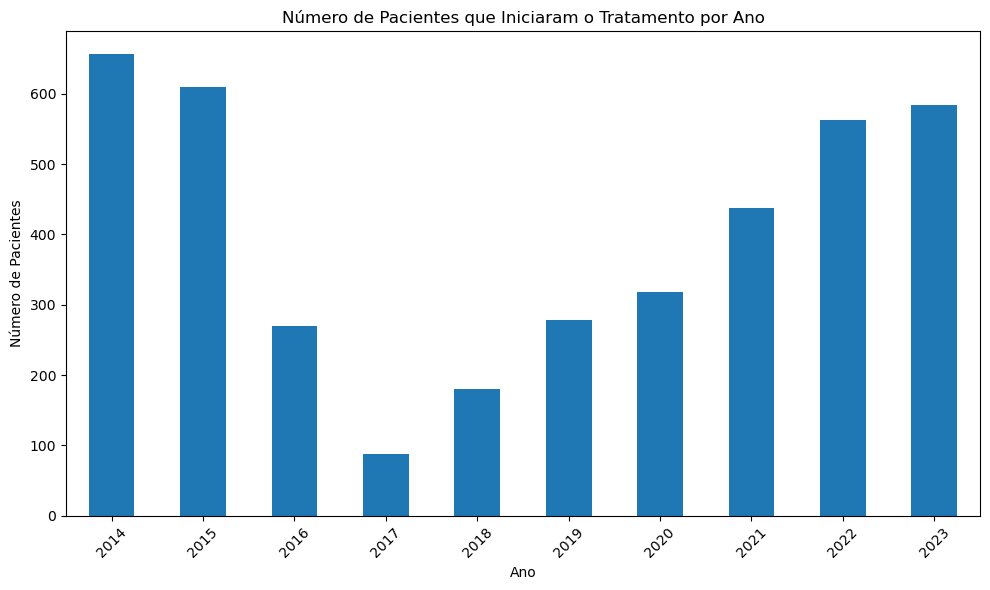

In [596]:
import matplotlib.pyplot as plt

# Filtrar pacientes que não têm registro no primeiro mês
primeiro_mes = datas_atendimento['primeira_data_atendimento'].dt.to_period('M').min()
datas_atendimento = datas_atendimento[datas_atendimento['primeira_data_atendimento'].dt.to_period('M') != primeiro_mes].copy()

# Gerar o gráfico
datas_atendimento['ano_inicio'] = datas_atendimento['primeira_data_atendimento'].dt.year
pacientes_por_ano = datas_atendimento.groupby('ano_inicio')['numero_cns_paciente'].nunique()

plt.figure(figsize=(10, 6))
pacientes_por_ano.plot(kind='bar')
plt.title('Número de Pacientes que Iniciaram o Tratamento por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../TCC Latex/images/pacientes_iniciaram_tratamento_por_ano.png')
plt.show()

#### Quantos pacientes sairam do tratamento ano a ano

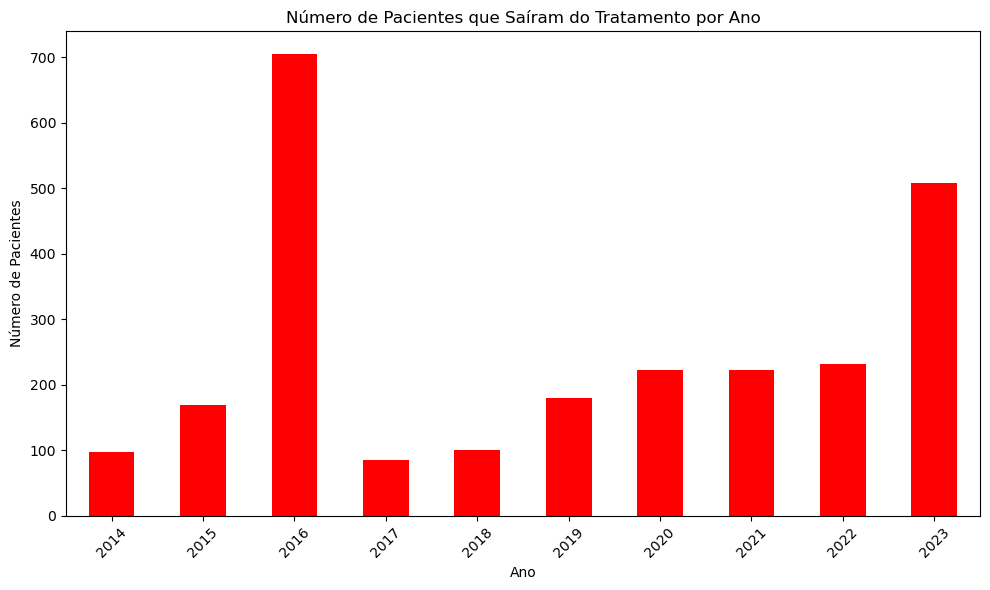

In [597]:
# Filtrar pacientes que não têm registro no último mês
ultimo_mes = datas_atendimento['ultima_data_atendimento'].dt.to_period('M').max()
datas_atendimento = datas_atendimento[datas_atendimento['ultima_data_atendimento'].dt.to_period('M') != ultimo_mes]

# Extrair o ano da coluna 'ultima_data_atendimento'
datas_atendimento.loc[:, 'ano_saida'] = datas_atendimento['ultima_data_atendimento'].dt.year

# Contar o número de pacientes que saíram do tratamento por ano
pacientes_por_ano_saida = datas_atendimento.groupby('ano_saida')['numero_cns_paciente'].nunique()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
pacientes_por_ano_saida.plot(kind='bar', color='red')
plt.title('Número de Pacientes que Saíram do Tratamento por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../TCC Latex/images/pacientes_sairam_tratamento_por_ano.png')
plt.show()

#### Quantos pacientes trocaram de tratamento ano a ano

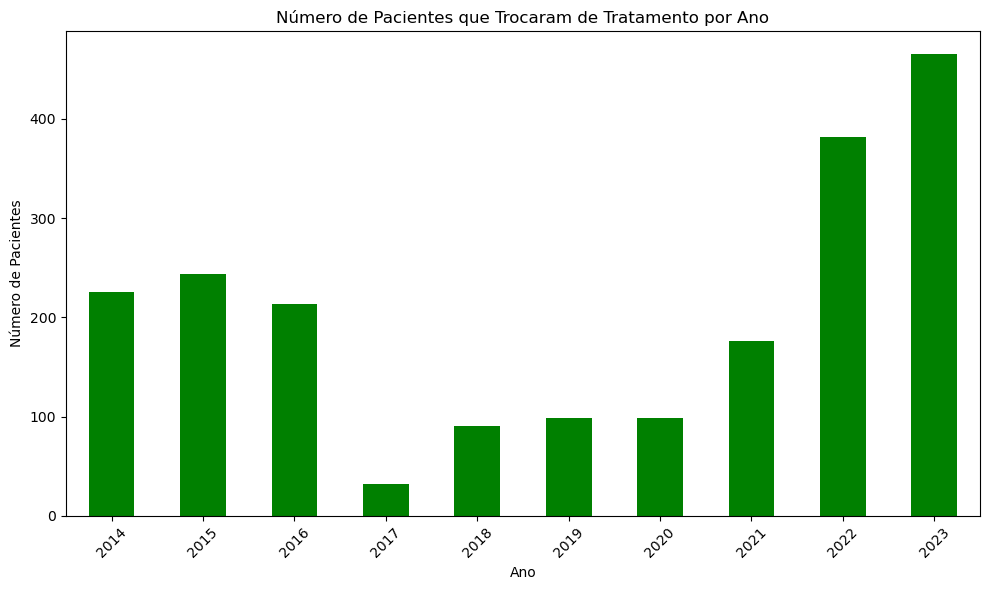

In [598]:
# Criar uma cópia do DataFrame original
df_copia = rj_epilepsia_total.copy()

# Converter as colunas de data para datetime
df_copia['data_atendimento'] = pd.to_datetime(df_copia['data_atendimento'])

# Ordenar os dados por paciente e data de atendimento
df_copia.sort_values(by=['numero_cns_paciente', 'data_atendimento'], inplace=True)

# Detectar mudanças no tratamento para cada paciente, ignorando o primeiro tratamento
df_copia['tratamento_anterior'] = df_copia.groupby('numero_cns_paciente')['procedimento_principal_extenso'].shift()
df_copia['mudanca_tratamento'] = (df_copia['tratamento_anterior'] != df_copia['procedimento_principal_extenso']) & df_copia['tratamento_anterior'].notna()

# Filtrar apenas as mudanças de tratamento
mudancas_tratamento = df_copia[df_copia['mudanca_tratamento']].copy()

# Extrair o ano da mudança usando .loc[] para evitar SettingWithCopyWarning
mudancas_tratamento.loc[:, 'ano_mudanca'] = mudancas_tratamento['data_atendimento'].dt.year

# Contar o número de pacientes que mudaram de tratamento por ano
pacientes_por_ano_mudanca = mudancas_tratamento.groupby('ano_mudanca')['numero_cns_paciente'].nunique()

# Plotar o gráfico e salvar como PNG
plt.figure(figsize=(10, 6))
pacientes_por_ano_mudanca.plot(kind='bar', color='green')
plt.title('Número de Pacientes que Trocaram de Tratamento por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../TCC Latex/images/pacientes_troca_tratamento_por_ano.png')
plt.show()

#### Qual foi o tempo médio de permanência no programa?

In [599]:
datas_atendimento["dias_tratamento"] = (datas_atendimento["ultima_data_atendimento"] - datas_atendimento["primeira_data_atendimento"]).dt.days
datas_atendimento["meses_atendimento"] = (datas_atendimento["dias_tratamento"]/30.44).astype(float)
datas_atendimento[datas_atendimento["meses_atendimento"] < 6]

,numero_cns_paciente,primeira_data_atendimento,sexo_paciente,numero_idade,ultima_data_atendimento,ano_inicio,ano_saida,dias_tratamento,meses_atendimento
10,|{~äéä|äâ{{{~,2014-03-01,M,73,2014-07-01,2014,2014,122,4.007884
21,|{ü{âÇéä~|ü{{{ü,2014-03-01,M,58,2014-05-01,2014,2014,61,2.003942
25,|{üÇé{éÇâüÇ{{{|,2015-07-01,M,55,2015-09-01,2015,2015,62,2.036794
28,|}{Ç{~ÇÇ~}{{|â,2016-06-01,M,50,2016-10-01,2016,2016,122,4.007884
29,|}{äÇäâé|ü{{|â,2016-01-01,M,69,2016-07-01,2016,2016,182,5.978975
...,...,...,...,...,...,...,...,...,...
5290,é{üé{{Ç~|}ââ|Ç,2018-01-01,M,37,2018-06-01,2018,2018,151,4.960578
5293,é{üé{|Ç~~ââäé|~,2015-09-01,F,34,2016-03-01,2015,2016,182,5.978975
5304,é{üé{â}âéâ|{Ç}{,2023-05-01,F,33,2023-10-01,2023,2023,153,5.026281
5310,é{üé{ü}~Çéé{é}{,2016-07-01,F,54,2016-09-01,2016,2016,62,2.036794


### Piramide Etaria por medicamento

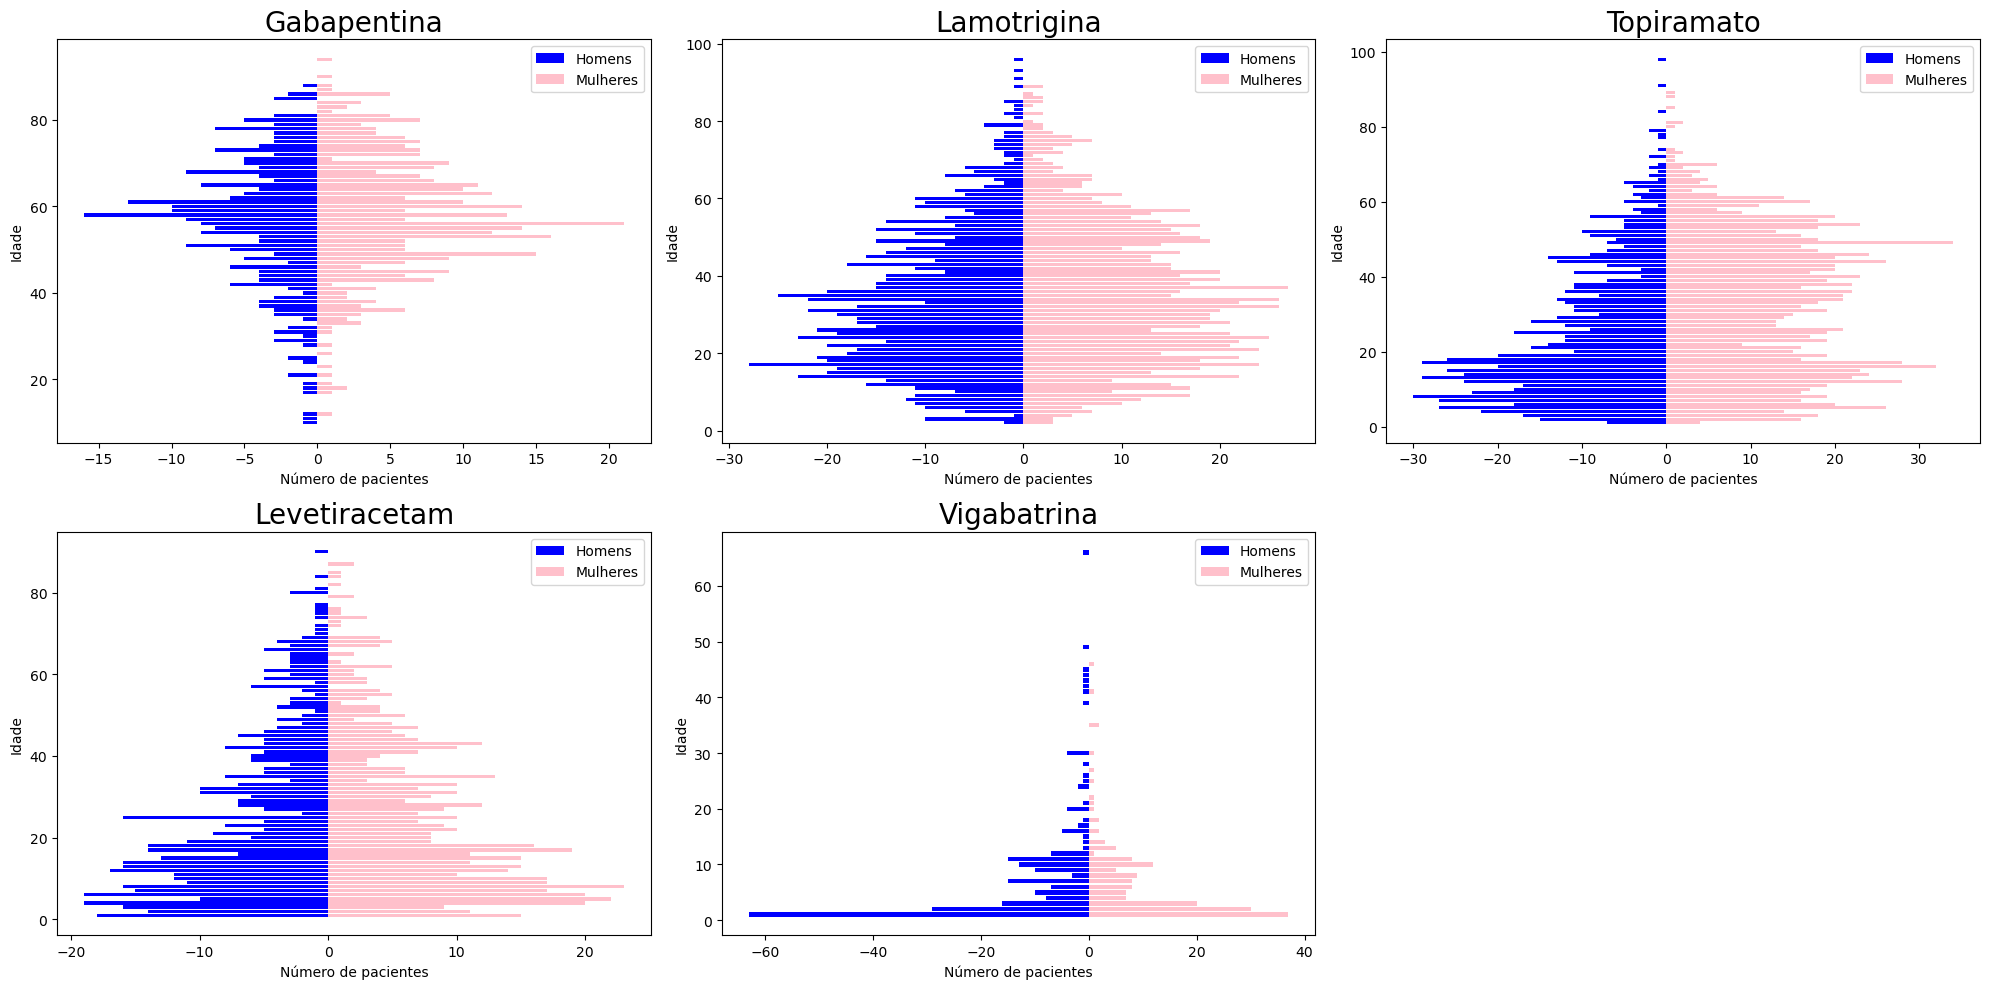

In [600]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que o dataframe se chama rj_epilepsia_total
rj_epilepsia_total_sorted = rj_epilepsia_total.copy()  # Fazer uma cópia para evitar o SettingWithCopyWarning
rj_epilepsia_total_sorted.loc[:, 'data_atendimento_paciente'] = pd.to_datetime(rj_epilepsia_total_sorted['data_atendimento_paciente'])

# Ordenar por paciente, medicamento (procedimento_principal_unico) e data de atendimento
rj_epilepsia_total_sorted = rj_epilepsia_total.sort_values(by=['numero_cns_paciente', 'procedimento_principal_unico', 'data_atendimento_paciente'])

# Remover duplicatas mantendo apenas o primeiro registro de atendimento por paciente e medicamento
primeiro_atendimento = rj_epilepsia_total_sorted.drop_duplicates(subset=['numero_cns_paciente', 'procedimento_principal_unico'], keep='first')

# Agrupar dados por idade e sexo para cada medicamento (procedimento_principal_unico)
medicamentos = primeiro_atendimento['procedimento_principal_unico'].unique()
dados_agrupados = {}

for medicamento in medicamentos:
    dados_medicamento = primeiro_atendimento[primeiro_atendimento['procedimento_principal_unico'] == medicamento]
    
    # Agrupar por idade e sexo
    dados_agrupados_masculino = (
        dados_medicamento[dados_medicamento["sexo_paciente"] == "M"]
        .groupby(["numero_idade", "sexo_paciente"])
        .size()
        .to_frame(name="Numero de pacientes")
        .reset_index()
        .sort_values(by=["numero_idade"], ascending=True)
    )

    dados_agrupados_feminino = (
        dados_medicamento[dados_medicamento["sexo_paciente"] == "F"]
        .groupby(["numero_idade", "sexo_paciente"])
        .size()
        .to_frame(name="Numero de pacientes")
        .reset_index()
        .sort_values(by=["numero_idade"], ascending=True)
    )

    dados_agrupados[medicamento] = {
        'masculino': dados_agrupados_masculino,
        'feminino': dados_agrupados_feminino
    }

# Número de colunas e linhas no grid
num_cols = 3
num_medicamentos = len(medicamentos)
num_rows = (num_medicamentos + num_cols - 1) // num_cols

# Criar figura e subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Flatten axes para fácil iteração
axes = axes.flatten()

# Definir cores por sexo
cores = {"M": "blue", "F": "pink"}

for idx, medicamento in enumerate(medicamentos):
    ax = axes[idx]
    
    dados_masc = dados_agrupados[medicamento]['masculino']
    dados_fem = dados_agrupados[medicamento]['feminino']
    
    # Gráfico para homens (negativo para fazer a pirâmide)
    ax.barh(dados_masc["numero_idade"], -dados_masc["Numero de pacientes"], color=cores["M"], label='Homens')
    
    # Gráfico para mulheres
    ax.barh(dados_fem["numero_idade"], dados_fem["Numero de pacientes"], color=cores["F"], label='Mulheres')
    
    ax.set_xlabel("Número de pacientes")
    ax.set_title(f"{medicamento}", fontsize=20)  # Aumentando o tamanho da fonte do título
    ax.set_ylabel("Idade")
    ax.legend()

# Remover eixos não utilizados
for i in range(num_medicamentos, len(axes)):
    fig.delaxes(axes[i])

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# Salvar figura em um único arquivo PNG
fig.savefig("../TCC Latex/images/grid_piramides_etarias.png")


### Piramide Etaria do primeiro tratamento

In [601]:
import matplotlib.pyplot as plt

# Agrupar por 'idade', 'sexo_paciente' e calcular a contagem de pacientes
tabela_agrupada_masculino = (
    datas_atendimento[datas_atendimento["sexo_paciente"] == "M"]
    .groupby(["numero_idade", "sexo_paciente"])
    .size()
    .to_frame(name="Numero de pacientes")
    .reset_index()
    .sort_values(by=["numero_idade"], ascending=True)
)

tabela_agrupada_feminino = (
    datas_atendimento[datas_atendimento["sexo_paciente"] == "F"]
    .groupby(["numero_idade", "sexo_paciente"])
    .size()
    .to_frame(name="Numero de pacientes")
    .reset_index()
    .sort_values(by=["numero_idade"], ascending=True)
)

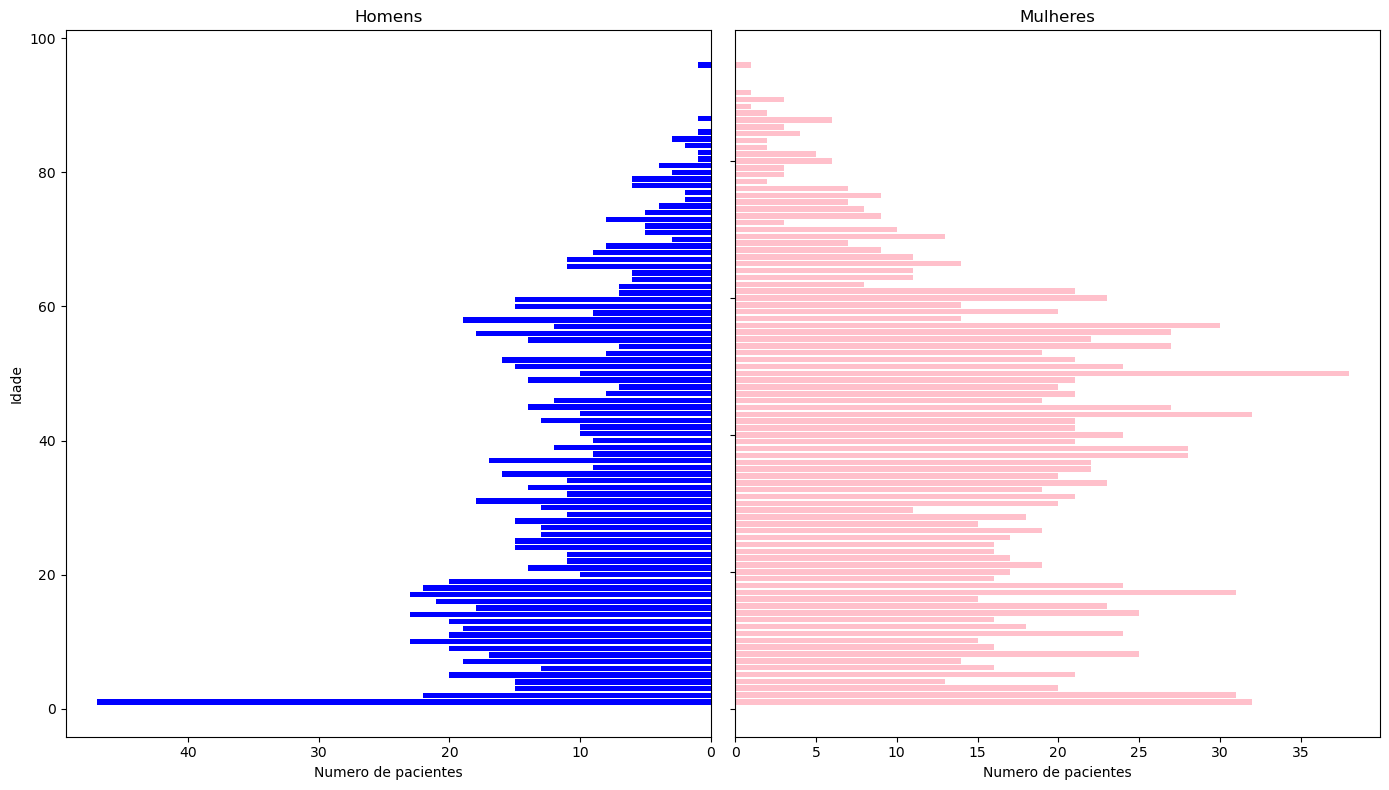

In [602]:
# Definir cores por sexo
cores = {"M": "blue", "F": "pink"}

# Criar figura e subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Gráfico para homens
ax1.barh(tabela_agrupada_masculino["numero_idade"], tabela_agrupada_masculino["Numero de pacientes"], color=cores["M"])
ax1.set_xlabel("Numero de pacientes")
ax1.set_title("Homens")
ax1.set_ylabel("Idade") 
ax1.invert_xaxis() 

# Gráfico para mulheres
ax2.barh(tabela_agrupada_feminino["numero_idade"], tabela_agrupada_feminino["Numero de pacientes"], color=cores["F"])
ax2.set_xlabel("Numero de pacientes")
ax2.set_title("Mulheres")
ax1.set_ylabel("Idade")
ax2.set_yticklabels([])

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# Salvar figura em um único arquivo PNG
fig.savefig("../TCC Latex/images/piramide_etaria_completa.png")

# Export Final

In [603]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,cid_sencundario,cid_principal_extenso,motivo_saida_permanencia_extenso,procedimento_principal_extenso,procedimento_principal_unico,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal,cid_principal_completo
1319,201402,201402,604500084,âäâ{{{üüä{ÇÇüâ,4,27,20140202,F,99,330455,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,27 anos,27.0,G403 - Epilepsia e síndromes epilépticas gener...
1320,201402,201402,604500050,âäâ{{~{|{~ééé,4,33,20140202,F,99,330490,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,São Gonçalo,2014-02-01,33 anos,33.0,G403 - Epilepsia e síndromes epilépticas gener...
1321,201402,201402,604500050,â{|~|}~Çâ{~ü,4,28,20131202,M,99,330385,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Paty do Alferes,2014-02-01,28 anos,28.0,G400 - Epilepsia e síndromes epilépticas idiop...
1323,201402,201402,604500084,âäâ{{~|üÇüéâ,4,7,20140202,F,99,330455,...,0,Epilepsia e síndromes epilépticas idiopáticas ...,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Topiramato,Rio de Janeiro,2014-02-01,7 anos,7.0,G400 - Epilepsia e síndromes epilépticas idiop...
1324,201402,201402,604500050,âäâ{{|{||Ç}ÇÇ{|,4,53,20140102,F,99,330250,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Magé,2014-02-01,53 anos,53.0,G402 - Epilepsia e síndromes epilépticas sinto...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,Outras epilepsias,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Topiramato,São Fidélis,2023-12-01,89 anos,89.0,G408 - Outras epilepsias
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Lamotrigina,Rio de Janeiro,2023-12-01,61 anos,61.0,G402 - Epilepsia e síndromes epilépticas sinto...
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,Epilepsia e síndromes epilépticas sintomáticas...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Macaé,2023-12-01,17 anos,17.0,G402 - Epilepsia e síndromes epilépticas sinto...
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,Epilepsia e síndromes epilépticas generalizada...,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Levetiracetam,Itatiaia,2023-12-01,18 anos,18.0,G403 - Epilepsia e síndromes epilépticas gener...


In [604]:
# Export

rj_epilepsia_total.to_csv('../Dados/Base atualizada/rj_epilepsia_total.csv', sep =';')